## Logic Based FizzBuzz Function [Software 1.0]

In [194]:
import pandas as pd #It is an Python Library and used for data manipulation and analysis.
                    #It works with labeled and relational data.

def fizzbuzz(n): #function is defined here with the function name as "fizzbuzz" and having parameter as "n"
    
    
    if n % 3 == 0 and n % 5 == 0:   #if n is divided by both 3 and 5 , then the function "fizzbuzz" return the value as FizzBuzz
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'         #else if n is divided by 3  , then the function "fizzbuzz" return the value as Fizz
    elif n % 5 == 0:
        return 'Buzz'        #else if n is divided by 5  , then the function "fizzbuzz" return the value as Buzz
    else:
        return 'Other'       #if n is neither divided by 3 or 5 or both, then the function "fizzbuzz" return the value as Other

## Create Training and Testing Datasets in CSV Format

In [195]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    # List is ordered, changable and immutable. In list, each entry will hold one training data.
    inputData   = [] # inputData holds input value
    outputData  = [] # output data hold output value
    
    # Why do we need training Data? 
    # Training data is needed to train the model which in turn increases the accurancy of model.
    # Training data is used in training phase. It basically reduces the error between the actually output and labelled output.
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe? 
    # Dataframe is one of the data structure offered by Pandas. It is used to store array values in tabular form
    # And in DataFrame datatype can vary for different cells and in ths code our input are number and ouput is string
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [196]:
# processData is a function which in turn calling encodeData and encodeLabel
def processData(dataset):
    
    # Why do we have to process?
    # We have to process the data because here we are expecting input and output in particular form i.e input in numbers
    # and output in string form
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [197]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        # encodeData function will convert the input into Binary equivalent
        # As the number of neurons is 10 and this is due to the input being converted into the binary format,
        # we will have to consider 10 bits to accomodate large decimal number
        
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [198]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [199]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
 #drop_out = 0.2
drop_out = 0.1
first_dense_layer_nodes  = 450
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    # A model is used to recieve inputs and help us in processing the data , so it can be considered as a basic data 
    # structure of python that uses keras. To access any data stored in the data set, we need simple operation that
    # can be performed on the model defined. 
    
    # Why use Dense layer and then activation?
    # Dense layer is a linear operation in which every input is connected to every output by a weight
    # So first we introduce layer to model, afterwards we assign the activation function to that particular layer.
    # Activation function is basically used to fire a neuron
    
    # Why use sequential model with layers?
    # Here we want to pass through the layers in a sequential manner i.e one after the other, 
    # so we need sequential model with layer
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))# here in input_dim, we are assigning the input size of  
    model.add(Activation('relu'))                               # first layer.
    #model.add(Activation('sigmoid'))
    
    # Why dropout?  
    # Any machine learning algorithm tends to over learn the data.
    # That is, it tries to fit the graph to meet all the points in the training set.
    # This situation can be avoided if and only if we take care such that, there are atleast few misses in the input
    # training data which will avoid curve from over fitting.
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    # The advantage of using Softmax activation function is that the output probability range will 0 to 1 and 
    # the sum of all probabilities will be equal to 1. Softmax activation functions are usually used in the output
    # layer in classification problems
    
    model.summary()
    
    # Why use categorical_crossentropy?
    # Here we are using SOftmax as the activation function and categorical_crossentroy best matchs with Softmax 
    # because in Softmax the output probability range will 0 to 1 and the sum of all probabilities will be equal to 1.
    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])#rmsprop
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [200]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [201]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 450)               4950      
_________________________________________________________________
activation_33 (Activation)   (None, 450)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 450)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 1804      
_________________________________________________________________
activation_34 (Activation)   (None, 4)                 0         
Total params: 6,754
Trainable params: 6,754
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [202]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 1s 700us/step - loss: 1.3935 - acc: 0.2111 - val_loss: 1.3778 - val_acc: 0.1833
Epoch 2/10000
720/720 [==============================] - 0s 61us/step - loss: 1.3504 - acc: 0.2819 - val_loss: 1.3318 - val_acc: 0.2611
Epoch 3/10000
720/720 [==============================] - 0s 39us/step - loss: 1.3166 - acc: 0.3944 - val_loss: 1.2940 - val_acc: 0.4556
Epoch 4/10000
720/720 [==============================] - 0s 50us/step - loss: 1.2834 - acc: 0.4903 - val_loss: 1.2640 - val_acc: 0.5222
Epoch 5/10000
720/720 [==============================] - 0s 44us/step - loss: 1.2637 - acc: 0.5181 - val_loss: 1.2396 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 44us/step - loss: 1.2437 - acc: 0.5264 - val_loss: 1.2200 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 44us/step - loss: 1.2233 - acc: 0.5306 - val_loss: 1.2045 - val_acc: 0.5333
E

720/720 [==============================] - 0s 39us/step - loss: 1.1439 - acc: 0.5333 - val_loss: 1.1435 - val_acc: 0.5333
Epoch 61/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1458 - acc: 0.5333 - val_loss: 1.1435 - val_acc: 0.5333
Epoch 62/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1474 - acc: 0.5333 - val_loss: 1.1435 - val_acc: 0.5333
Epoch 63/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1466 - acc: 0.5333 - val_loss: 1.1435 - val_acc: 0.5333
Epoch 64/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1465 - acc: 0.5333 - val_loss: 1.1436 - val_acc: 0.5333
Epoch 65/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1447 - acc: 0.5333 - val_loss: 1.1436 - val_acc: 0.5333
Epoch 66/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1453 - acc: 0.5333 - val_loss: 1.1436 - val_acc: 0.5333
Epoch 67/10000
720/720 [==============================] 

Epoch 120/10000
720/720 [==============================] - 0s 44us/step - loss: 1.1408 - acc: 0.5333 - val_loss: 1.1431 - val_acc: 0.5333
Epoch 121/10000
720/720 [==============================] - 0s 44us/step - loss: 1.1402 - acc: 0.5333 - val_loss: 1.1431 - val_acc: 0.5333
Epoch 122/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1380 - acc: 0.5333 - val_loss: 1.1430 - val_acc: 0.5333
Epoch 123/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1431 - acc: 0.5333 - val_loss: 1.1430 - val_acc: 0.5333
Epoch 124/10000
720/720 [==============================] - 0s 44us/step - loss: 1.1400 - acc: 0.5333 - val_loss: 1.1431 - val_acc: 0.5333
Epoch 125/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1385 - acc: 0.5333 - val_loss: 1.1430 - val_acc: 0.5333
Epoch 126/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1371 - acc: 0.5333 - val_loss: 1.1431 - val_acc: 0.5333
Epoch 127/10000
720/720 [=========

720/720 [==============================] - 0s 39us/step - loss: 1.1369 - acc: 0.5333 - val_loss: 1.1430 - val_acc: 0.5333
Epoch 180/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1393 - acc: 0.5333 - val_loss: 1.1429 - val_acc: 0.5333
Epoch 181/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1369 - acc: 0.5333 - val_loss: 1.1429 - val_acc: 0.5333
Epoch 182/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1356 - acc: 0.5333 - val_loss: 1.1429 - val_acc: 0.5333
Epoch 183/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1392 - acc: 0.5333 - val_loss: 1.1428 - val_acc: 0.5333
Epoch 184/10000
720/720 [==============================] - 0s 50us/step - loss: 1.1374 - acc: 0.5333 - val_loss: 1.1428 - val_acc: 0.5333
Epoch 185/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1336 - acc: 0.5333 - val_loss: 1.1427 - val_acc: 0.5333
Epoch 186/10000
720/720 [=========================

720/720 [==============================] - 0s 33us/step - loss: 1.1340 - acc: 0.5333 - val_loss: 1.1428 - val_acc: 0.5333
Epoch 239/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1323 - acc: 0.5333 - val_loss: 1.1428 - val_acc: 0.5333
Epoch 240/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1339 - acc: 0.5333 - val_loss: 1.1427 - val_acc: 0.5333
Epoch 241/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1342 - acc: 0.5333 - val_loss: 1.1426 - val_acc: 0.5333
Epoch 242/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1355 - acc: 0.5333 - val_loss: 1.1425 - val_acc: 0.5333
Epoch 243/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1375 - acc: 0.5333 - val_loss: 1.1425 - val_acc: 0.5333
Epoch 244/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1355 - acc: 0.5333 - val_loss: 1.1425 - val_acc: 0.5333
Epoch 245/10000
720/720 [=========================

720/720 [==============================] - 0s 39us/step - loss: 1.1313 - acc: 0.5333 - val_loss: 1.1422 - val_acc: 0.5333
Epoch 298/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1296 - acc: 0.5333 - val_loss: 1.1422 - val_acc: 0.5333
Epoch 299/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1319 - acc: 0.5333 - val_loss: 1.1422 - val_acc: 0.5333
Epoch 300/10000
720/720 [==============================] - 0s 44us/step - loss: 1.1303 - acc: 0.5333 - val_loss: 1.1422 - val_acc: 0.5333
Epoch 301/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1321 - acc: 0.5333 - val_loss: 1.1423 - val_acc: 0.5333
Epoch 302/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1298 - acc: 0.5333 - val_loss: 1.1424 - val_acc: 0.5333
Epoch 303/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1333 - acc: 0.5333 - val_loss: 1.1423 - val_acc: 0.5333
Epoch 304/10000
720/720 [=========================

720/720 [==============================] - 0s 33us/step - loss: 1.1296 - acc: 0.5333 - val_loss: 1.1425 - val_acc: 0.5333
Epoch 357/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1276 - acc: 0.5333 - val_loss: 1.1424 - val_acc: 0.5333
Epoch 358/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1276 - acc: 0.5333 - val_loss: 1.1424 - val_acc: 0.5333
Epoch 359/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1313 - acc: 0.5333 - val_loss: 1.1423 - val_acc: 0.5333
Epoch 360/10000
720/720 [==============================] - 0s 44us/step - loss: 1.1307 - acc: 0.5333 - val_loss: 1.1421 - val_acc: 0.5333
Epoch 361/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1283 - acc: 0.5333 - val_loss: 1.1423 - val_acc: 0.5333
Epoch 362/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1290 - acc: 0.5333 - val_loss: 1.1423 - val_acc: 0.5333
Epoch 363/10000
720/720 [=========================

720/720 [==============================] - 0s 39us/step - loss: 1.1298 - acc: 0.5333 - val_loss: 1.1418 - val_acc: 0.5333
Epoch 416/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1275 - acc: 0.5333 - val_loss: 1.1418 - val_acc: 0.5333
Epoch 417/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1291 - acc: 0.5333 - val_loss: 1.1419 - val_acc: 0.5333
Epoch 418/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1285 - acc: 0.5333 - val_loss: 1.1420 - val_acc: 0.5333
Epoch 419/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1260 - acc: 0.5333 - val_loss: 1.1419 - val_acc: 0.5333
Epoch 420/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1267 - acc: 0.5333 - val_loss: 1.1419 - val_acc: 0.5333
Epoch 421/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1277 - acc: 0.5333 - val_loss: 1.1419 - val_acc: 0.5333
Epoch 422/10000
720/720 [=========================

720/720 [==============================] - 0s 50us/step - loss: 1.1264 - acc: 0.5333 - val_loss: 1.1416 - val_acc: 0.5333
Epoch 475/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1268 - acc: 0.5333 - val_loss: 1.1416 - val_acc: 0.5333
Epoch 476/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1243 - acc: 0.5333 - val_loss: 1.1416 - val_acc: 0.5333
Epoch 477/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1252 - acc: 0.5333 - val_loss: 1.1416 - val_acc: 0.5333
Epoch 478/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1219 - acc: 0.5333 - val_loss: 1.1416 - val_acc: 0.5333
Epoch 479/10000
720/720 [==============================] - 0s 44us/step - loss: 1.1261 - acc: 0.5333 - val_loss: 1.1415 - val_acc: 0.5333
Epoch 480/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1255 - acc: 0.5333 - val_loss: 1.1415 - val_acc: 0.5333
Epoch 481/10000
720/720 [=========================

720/720 [==============================] - 0s 39us/step - loss: 1.1214 - acc: 0.5333 - val_loss: 1.1412 - val_acc: 0.5333
Epoch 534/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1243 - acc: 0.5333 - val_loss: 1.1413 - val_acc: 0.5333
Epoch 535/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1213 - acc: 0.5333 - val_loss: 1.1412 - val_acc: 0.5333
Epoch 536/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1229 - acc: 0.5333 - val_loss: 1.1411 - val_acc: 0.5333
Epoch 537/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1225 - acc: 0.5333 - val_loss: 1.1411 - val_acc: 0.5333
Epoch 538/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1231 - acc: 0.5333 - val_loss: 1.1410 - val_acc: 0.5333
Epoch 539/10000
720/720 [==============================] - 0s 44us/step - loss: 1.1211 - acc: 0.5333 - val_loss: 1.1409 - val_acc: 0.5333
Epoch 540/10000
720/720 [=========================

720/720 [==============================] - 0s 33us/step - loss: 1.1230 - acc: 0.5333 - val_loss: 1.1408 - val_acc: 0.5333
Epoch 593/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1196 - acc: 0.5333 - val_loss: 1.1409 - val_acc: 0.5333
Epoch 594/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1185 - acc: 0.5333 - val_loss: 1.1408 - val_acc: 0.5333
Epoch 595/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1196 - acc: 0.5333 - val_loss: 1.1409 - val_acc: 0.5333
Epoch 596/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1186 - acc: 0.5333 - val_loss: 1.1408 - val_acc: 0.5333
Epoch 597/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1212 - acc: 0.5333 - val_loss: 1.1408 - val_acc: 0.5333
Epoch 598/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1190 - acc: 0.5333 - val_loss: 1.1408 - val_acc: 0.5333
Epoch 599/10000
720/720 [=========================

720/720 [==============================] - 0s 33us/step - loss: 1.1182 - acc: 0.5333 - val_loss: 1.1404 - val_acc: 0.5333
Epoch 652/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1179 - acc: 0.5333 - val_loss: 1.1403 - val_acc: 0.5333
Epoch 653/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1166 - acc: 0.5333 - val_loss: 1.1402 - val_acc: 0.5333
Epoch 654/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1163 - acc: 0.5333 - val_loss: 1.1402 - val_acc: 0.5333
Epoch 655/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1185 - acc: 0.5333 - val_loss: 1.1402 - val_acc: 0.5333
Epoch 656/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1176 - acc: 0.5333 - val_loss: 1.1402 - val_acc: 0.5333
Epoch 657/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1168 - acc: 0.5333 - val_loss: 1.1402 - val_acc: 0.5333
Epoch 658/10000
720/720 [=========================

720/720 [==============================] - 0s 39us/step - loss: 1.1159 - acc: 0.5333 - val_loss: 1.1399 - val_acc: 0.5333
Epoch 711/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1141 - acc: 0.5333 - val_loss: 1.1399 - val_acc: 0.5333
Epoch 712/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1115 - acc: 0.5333 - val_loss: 1.1398 - val_acc: 0.5333
Epoch 713/10000
720/720 [==============================] - 0s 44us/step - loss: 1.1130 - acc: 0.5333 - val_loss: 1.1398 - val_acc: 0.5333
Epoch 714/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1171 - acc: 0.5333 - val_loss: 1.1398 - val_acc: 0.5333
Epoch 715/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1138 - acc: 0.5333 - val_loss: 1.1398 - val_acc: 0.5333
Epoch 716/10000
720/720 [==============================] - 0s 44us/step - loss: 1.1169 - acc: 0.5333 - val_loss: 1.1397 - val_acc: 0.5333
Epoch 717/10000
720/720 [=========================

720/720 [==============================] - 0s 44us/step - loss: 1.1106 - acc: 0.5333 - val_loss: 1.1390 - val_acc: 0.5333
Epoch 770/10000
720/720 [==============================] - 0s 50us/step - loss: 1.1099 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 771/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1113 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 772/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1126 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 773/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1129 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 774/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1131 - acc: 0.5333 - val_loss: 1.1390 - val_acc: 0.5333
Epoch 775/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1130 - acc: 0.5333 - val_loss: 1.1390 - val_acc: 0.5333
Epoch 776/10000
720/720 [=========================

720/720 [==============================] - 0s 44us/step - loss: 1.1095 - acc: 0.5333 - val_loss: 1.1384 - val_acc: 0.5333
Epoch 829/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1103 - acc: 0.5333 - val_loss: 1.1384 - val_acc: 0.5333
Epoch 830/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1078 - acc: 0.5333 - val_loss: 1.1384 - val_acc: 0.5333
Epoch 831/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1096 - acc: 0.5333 - val_loss: 1.1384 - val_acc: 0.5333
Epoch 832/10000
720/720 [==============================] - 0s 50us/step - loss: 1.1110 - acc: 0.5333 - val_loss: 1.1384 - val_acc: 0.5333
Epoch 833/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1084 - acc: 0.5333 - val_loss: 1.1384 - val_acc: 0.5333
Epoch 834/10000
720/720 [==============================] - 0s 44us/step - loss: 1.1104 - acc: 0.5333 - val_loss: 1.1384 - val_acc: 0.5333
Epoch 835/10000
720/720 [=========================

720/720 [==============================] - 0s 39us/step - loss: 1.1057 - acc: 0.5333 - val_loss: 1.1374 - val_acc: 0.5333
Epoch 888/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1025 - acc: 0.5333 - val_loss: 1.1374 - val_acc: 0.5333
Epoch 889/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1043 - acc: 0.5333 - val_loss: 1.1374 - val_acc: 0.5333
Epoch 890/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1053 - acc: 0.5333 - val_loss: 1.1374 - val_acc: 0.5333
Epoch 891/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1051 - acc: 0.5333 - val_loss: 1.1374 - val_acc: 0.5333
Epoch 892/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1070 - acc: 0.5333 - val_loss: 1.1374 - val_acc: 0.5333
Epoch 893/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1070 - acc: 0.5333 - val_loss: 1.1373 - val_acc: 0.5333
Epoch 894/10000
720/720 [=========================

720/720 [==============================] - 0s 39us/step - loss: 1.1012 - acc: 0.5333 - val_loss: 1.1363 - val_acc: 0.5333
Epoch 947/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1005 - acc: 0.5333 - val_loss: 1.1363 - val_acc: 0.5333
Epoch 948/10000
720/720 [==============================] - 0s 33us/step - loss: 1.1058 - acc: 0.5333 - val_loss: 1.1363 - val_acc: 0.5333
Epoch 949/10000
720/720 [==============================] - 0s 50us/step - loss: 1.1002 - acc: 0.5333 - val_loss: 1.1363 - val_acc: 0.5333
Epoch 950/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1026 - acc: 0.5333 - val_loss: 1.1363 - val_acc: 0.5333
Epoch 951/10000
720/720 [==============================] - 0s 44us/step - loss: 1.1033 - acc: 0.5333 - val_loss: 1.1362 - val_acc: 0.5333
Epoch 952/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1028 - acc: 0.5333 - val_loss: 1.1362 - val_acc: 0.5333
Epoch 953/10000
720/720 [=========================

720/720 [==============================] - 0s 33us/step - loss: 1.0978 - acc: 0.5333 - val_loss: 1.1348 - val_acc: 0.5333
Epoch 1006/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0976 - acc: 0.5333 - val_loss: 1.1348 - val_acc: 0.5333
Epoch 1007/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0985 - acc: 0.5333 - val_loss: 1.1348 - val_acc: 0.5333
Epoch 1008/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0985 - acc: 0.5333 - val_loss: 1.1348 - val_acc: 0.5333
Epoch 1009/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0984 - acc: 0.5333 - val_loss: 1.1348 - val_acc: 0.5333
Epoch 1010/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0987 - acc: 0.5333 - val_loss: 1.1348 - val_acc: 0.5333
Epoch 1011/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0970 - acc: 0.5333 - val_loss: 1.1348 - val_acc: 0.5333
Epoch 1012/10000
720/720 [==================

Epoch 1064/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0966 - acc: 0.5333 - val_loss: 1.1337 - val_acc: 0.5333
Epoch 1065/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0924 - acc: 0.5333 - val_loss: 1.1336 - val_acc: 0.5333
Epoch 1066/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0955 - acc: 0.5333 - val_loss: 1.1336 - val_acc: 0.5333
Epoch 1067/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0945 - acc: 0.5333 - val_loss: 1.1336 - val_acc: 0.5333
Epoch 1068/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0957 - acc: 0.5333 - val_loss: 1.1336 - val_acc: 0.5333
Epoch 1069/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0940 - acc: 0.5333 - val_loss: 1.1335 - val_acc: 0.5333
Epoch 1070/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0948 - acc: 0.5333 - val_loss: 1.1335 - val_acc: 0.5333
Epoch 1071/10000
720/720 [=

Epoch 1123/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0925 - acc: 0.5333 - val_loss: 1.1322 - val_acc: 0.5333
Epoch 1124/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0866 - acc: 0.5333 - val_loss: 1.1321 - val_acc: 0.5333
Epoch 1125/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0935 - acc: 0.5333 - val_loss: 1.1321 - val_acc: 0.5333
Epoch 1126/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0918 - acc: 0.5333 - val_loss: 1.1321 - val_acc: 0.5333
Epoch 1127/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0915 - acc: 0.5333 - val_loss: 1.1321 - val_acc: 0.5333
Epoch 1128/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0913 - acc: 0.5333 - val_loss: 1.1320 - val_acc: 0.5333
Epoch 1129/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0910 - acc: 0.5333 - val_loss: 1.1319 - val_acc: 0.5333
Epoch 1130/10000
720/720 [=

Epoch 1182/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0873 - acc: 0.5333 - val_loss: 1.1304 - val_acc: 0.5333
Epoch 1183/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0833 - acc: 0.5333 - val_loss: 1.1303 - val_acc: 0.5333
Epoch 1184/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0864 - acc: 0.5333 - val_loss: 1.1303 - val_acc: 0.5333
Epoch 1185/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0872 - acc: 0.5333 - val_loss: 1.1303 - val_acc: 0.5333
Epoch 1186/10000
720/720 [==============================] - 0s 50us/step - loss: 1.0855 - acc: 0.5333 - val_loss: 1.1302 - val_acc: 0.5333
Epoch 1187/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0837 - acc: 0.5333 - val_loss: 1.1303 - val_acc: 0.5333
Epoch 1188/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0841 - acc: 0.5333 - val_loss: 1.1303 - val_acc: 0.5333
Epoch 1189/10000
720/720 [=

720/720 [==============================] - 0s 39us/step - loss: 1.0823 - acc: 0.5333 - val_loss: 1.1286 - val_acc: 0.5333
Epoch 1241/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0811 - acc: 0.5333 - val_loss: 1.1285 - val_acc: 0.5333
Epoch 1242/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0822 - acc: 0.5333 - val_loss: 1.1285 - val_acc: 0.5333
Epoch 1243/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0817 - acc: 0.5333 - val_loss: 1.1285 - val_acc: 0.5333
Epoch 1244/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0841 - acc: 0.5347 - val_loss: 1.1285 - val_acc: 0.5333
Epoch 1245/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0807 - acc: 0.5347 - val_loss: 1.1284 - val_acc: 0.5333
Epoch 1246/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0832 - acc: 0.5333 - val_loss: 1.1284 - val_acc: 0.5333
Epoch 1247/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 1.0801 - acc: 0.5347 - val_loss: 1.1266 - val_acc: 0.5333
Epoch 1299/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0749 - acc: 0.5333 - val_loss: 1.1266 - val_acc: 0.5333
Epoch 1300/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0764 - acc: 0.5333 - val_loss: 1.1266 - val_acc: 0.5333
Epoch 1301/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0755 - acc: 0.5333 - val_loss: 1.1266 - val_acc: 0.5333
Epoch 1302/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0800 - acc: 0.5333 - val_loss: 1.1265 - val_acc: 0.5333
Epoch 1303/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0775 - acc: 0.5361 - val_loss: 1.1265 - val_acc: 0.5333
Epoch 1304/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0765 - acc: 0.5347 - val_loss: 1.1265 - val_acc: 0.5333
Epoch 1305/10000
720/720 [==================

720/720 [==============================] - 0s 44us/step - loss: 1.0744 - acc: 0.5333 - val_loss: 1.1245 - val_acc: 0.5333
Epoch 1357/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0732 - acc: 0.5333 - val_loss: 1.1244 - val_acc: 0.5333
Epoch 1358/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0719 - acc: 0.5333 - val_loss: 1.1244 - val_acc: 0.5333
Epoch 1359/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0713 - acc: 0.5347 - val_loss: 1.1244 - val_acc: 0.5333
Epoch 1360/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0707 - acc: 0.5333 - val_loss: 1.1243 - val_acc: 0.5333
Epoch 1361/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0716 - acc: 0.5347 - val_loss: 1.1242 - val_acc: 0.5333
Epoch 1362/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0749 - acc: 0.5333 - val_loss: 1.1241 - val_acc: 0.5333
Epoch 1363/10000
720/720 [==================

720/720 [==============================] - 0s 44us/step - loss: 1.0651 - acc: 0.5347 - val_loss: 1.1221 - val_acc: 0.5333
Epoch 1416/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0632 - acc: 0.5361 - val_loss: 1.1220 - val_acc: 0.5333
Epoch 1417/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0679 - acc: 0.5319 - val_loss: 1.1219 - val_acc: 0.5333
Epoch 1418/10000
720/720 [==============================] - 0s 50us/step - loss: 1.0656 - acc: 0.5375 - val_loss: 1.1218 - val_acc: 0.5333
Epoch 1419/10000
720/720 [==============================] - 0s 50us/step - loss: 1.0642 - acc: 0.5361 - val_loss: 1.1218 - val_acc: 0.5333
Epoch 1420/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0714 - acc: 0.5347 - val_loss: 1.1218 - val_acc: 0.5333
Epoch 1421/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0684 - acc: 0.5361 - val_loss: 1.1218 - val_acc: 0.5333
Epoch 1422/10000
720/720 [==================

720/720 [==============================] - 0s 39us/step - loss: 1.0611 - acc: 0.5389 - val_loss: 1.1191 - val_acc: 0.5333
Epoch 1475/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0603 - acc: 0.5361 - val_loss: 1.1191 - val_acc: 0.5333
Epoch 1476/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0559 - acc: 0.5347 - val_loss: 1.1190 - val_acc: 0.5333
Epoch 1477/10000
720/720 [==============================] - 0s 56us/step - loss: 1.0625 - acc: 0.5333 - val_loss: 1.1189 - val_acc: 0.5333
Epoch 1478/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0593 - acc: 0.5375 - val_loss: 1.1188 - val_acc: 0.5333
Epoch 1479/10000
720/720 [==============================] - 0s 56us/step - loss: 1.0617 - acc: 0.5375 - val_loss: 1.1188 - val_acc: 0.5333
Epoch 1480/10000
720/720 [==============================] - 0s 50us/step - loss: 1.0576 - acc: 0.5375 - val_loss: 1.1188 - val_acc: 0.5333
Epoch 1481/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 1.0570 - acc: 0.5375 - val_loss: 1.1161 - val_acc: 0.5333
Epoch 1534/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0596 - acc: 0.5375 - val_loss: 1.1160 - val_acc: 0.5333
Epoch 1535/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0554 - acc: 0.5333 - val_loss: 1.1161 - val_acc: 0.5333
Epoch 1536/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0514 - acc: 0.5333 - val_loss: 1.1160 - val_acc: 0.5333
Epoch 1537/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0541 - acc: 0.5375 - val_loss: 1.1158 - val_acc: 0.5333
Epoch 1538/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0530 - acc: 0.5403 - val_loss: 1.1158 - val_acc: 0.5333
Epoch 1539/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0540 - acc: 0.5375 - val_loss: 1.1157 - val_acc: 0.5333
Epoch 1540/10000
720/720 [==================

720/720 [==============================] - 0s 39us/step - loss: 1.0519 - acc: 0.5347 - val_loss: 1.1127 - val_acc: 0.5389
Epoch 1593/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0519 - acc: 0.5361 - val_loss: 1.1128 - val_acc: 0.5389
Epoch 1594/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0516 - acc: 0.5375 - val_loss: 1.1129 - val_acc: 0.5389
Epoch 1595/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0503 - acc: 0.5389 - val_loss: 1.1128 - val_acc: 0.5389
Epoch 1596/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0497 - acc: 0.5361 - val_loss: 1.1126 - val_acc: 0.5389
Epoch 1597/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0539 - acc: 0.5333 - val_loss: 1.1126 - val_acc: 0.5389
Epoch 1598/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0515 - acc: 0.5375 - val_loss: 1.1125 - val_acc: 0.5389
Epoch 1599/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 1.0438 - acc: 0.5417 - val_loss: 1.1094 - val_acc: 0.5444
Epoch 1652/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0435 - acc: 0.5444 - val_loss: 1.1093 - val_acc: 0.5444
Epoch 1653/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0372 - acc: 0.5389 - val_loss: 1.1094 - val_acc: 0.5444
Epoch 1654/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0408 - acc: 0.5403 - val_loss: 1.1091 - val_acc: 0.5444
Epoch 1655/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0459 - acc: 0.5389 - val_loss: 1.1092 - val_acc: 0.5444
Epoch 1656/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0383 - acc: 0.5417 - val_loss: 1.1090 - val_acc: 0.5444
Epoch 1657/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0378 - acc: 0.5389 - val_loss: 1.1089 - val_acc: 0.5444
Epoch 1658/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 1.0396 - acc: 0.5375 - val_loss: 1.1051 - val_acc: 0.5444
Epoch 1711/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0325 - acc: 0.5417 - val_loss: 1.1051 - val_acc: 0.5444
Epoch 1712/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0366 - acc: 0.5458 - val_loss: 1.1049 - val_acc: 0.5444
Epoch 1713/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0372 - acc: 0.5417 - val_loss: 1.1048 - val_acc: 0.5444
Epoch 1714/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0293 - acc: 0.5417 - val_loss: 1.1047 - val_acc: 0.5444
Epoch 1715/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0361 - acc: 0.5403 - val_loss: 1.1045 - val_acc: 0.5444
Epoch 1716/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0366 - acc: 0.5417 - val_loss: 1.1046 - val_acc: 0.5444
Epoch 1717/10000
720/720 [==================

Epoch 1769/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0334 - acc: 0.5458 - val_loss: 1.1010 - val_acc: 0.5444
Epoch 1770/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0297 - acc: 0.5458 - val_loss: 1.1011 - val_acc: 0.5444
Epoch 1771/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0287 - acc: 0.5417 - val_loss: 1.1011 - val_acc: 0.5444
Epoch 1772/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0287 - acc: 0.5486 - val_loss: 1.1009 - val_acc: 0.5444
Epoch 1773/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0280 - acc: 0.5361 - val_loss: 1.1007 - val_acc: 0.5444
Epoch 1774/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0287 - acc: 0.5458 - val_loss: 1.1006 - val_acc: 0.5444
Epoch 1775/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0339 - acc: 0.5375 - val_loss: 1.1004 - val_acc: 0.5444
Epoch 1776/10000
720/720 [=

Epoch 1828/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0264 - acc: 0.5514 - val_loss: 1.0964 - val_acc: 0.5500
Epoch 1829/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0270 - acc: 0.5375 - val_loss: 1.0963 - val_acc: 0.5500
Epoch 1830/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0204 - acc: 0.5528 - val_loss: 1.0964 - val_acc: 0.5500
Epoch 1831/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0220 - acc: 0.5444 - val_loss: 1.0960 - val_acc: 0.5444
Epoch 1832/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0193 - acc: 0.5375 - val_loss: 1.0961 - val_acc: 0.5500
Epoch 1833/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0175 - acc: 0.5528 - val_loss: 1.0961 - val_acc: 0.5500
Epoch 1834/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0212 - acc: 0.5514 - val_loss: 1.0960 - val_acc: 0.5500
Epoch 1835/10000
720/720 [=

Epoch 1887/10000
720/720 [==============================] - 0s 83us/step - loss: 1.0113 - acc: 0.5528 - val_loss: 1.0921 - val_acc: 0.5500
Epoch 1888/10000
720/720 [==============================] - 0s 89us/step - loss: 1.0116 - acc: 0.5514 - val_loss: 1.0920 - val_acc: 0.5500
Epoch 1889/10000
720/720 [==============================] - 0s 94us/step - loss: 1.0165 - acc: 0.5514 - val_loss: 1.0919 - val_acc: 0.5500
Epoch 1890/10000
720/720 [==============================] - 0s 94us/step - loss: 1.0167 - acc: 0.5528 - val_loss: 1.0917 - val_acc: 0.5500
Epoch 1891/10000
720/720 [==============================] - 0s 84us/step - loss: 1.0125 - acc: 0.5583 - val_loss: 1.0916 - val_acc: 0.5500
Epoch 1892/10000
720/720 [==============================] - 0s 86us/step - loss: 1.0165 - acc: 0.5486 - val_loss: 1.0916 - val_acc: 0.5500
Epoch 1893/10000
720/720 [==============================] - 0s 84us/step - loss: 1.0146 - acc: 0.5431 - val_loss: 1.0918 - val_acc: 0.5556
Epoch 1894/10000
720/720 [=

720/720 [==============================] - 0s 235us/step - loss: 1.0046 - acc: 0.5611 - val_loss: 1.0872 - val_acc: 0.5556
Epoch 1946/10000
720/720 [==============================] - 0s 151us/step - loss: 1.0082 - acc: 0.5514 - val_loss: 1.0872 - val_acc: 0.5611
Epoch 1947/10000
720/720 [==============================] - 0s 152us/step - loss: 1.0047 - acc: 0.5556 - val_loss: 1.0869 - val_acc: 0.5556
Epoch 1948/10000
720/720 [==============================] - 0s 102us/step - loss: 1.0039 - acc: 0.5500 - val_loss: 1.0868 - val_acc: 0.5556
Epoch 1949/10000
720/720 [==============================] - 0s 119us/step - loss: 1.0077 - acc: 0.5625 - val_loss: 1.0871 - val_acc: 0.5611
Epoch 1950/10000
720/720 [==============================] - 0s 96us/step - loss: 1.0084 - acc: 0.5500 - val_loss: 1.0869 - val_acc: 0.5611
Epoch 1951/10000
720/720 [==============================] - 0s 105us/step - loss: 1.0050 - acc: 0.5500 - val_loss: 1.0874 - val_acc: 0.5556
Epoch 1952/10000
720/720 [============

720/720 [==============================] - 0s 33us/step - loss: 1.0016 - acc: 0.5583 - val_loss: 1.0818 - val_acc: 0.5556
Epoch 2005/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9981 - acc: 0.5556 - val_loss: 1.0822 - val_acc: 0.5556
Epoch 2006/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9952 - acc: 0.5597 - val_loss: 1.0817 - val_acc: 0.5556
Epoch 2007/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9998 - acc: 0.5472 - val_loss: 1.0822 - val_acc: 0.5556
Epoch 2008/10000
720/720 [==============================] - 0s 33us/step - loss: 1.0017 - acc: 0.5625 - val_loss: 1.0818 - val_acc: 0.5611
Epoch 2009/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9994 - acc: 0.5625 - val_loss: 1.0820 - val_acc: 0.5500
Epoch 2010/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9926 - acc: 0.5667 - val_loss: 1.0815 - val_acc: 0.5556
Epoch 2011/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.9884 - acc: 0.5583 - val_loss: 1.0763 - val_acc: 0.5611
Epoch 2064/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9935 - acc: 0.5694 - val_loss: 1.0760 - val_acc: 0.5611
Epoch 2065/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9952 - acc: 0.5583 - val_loss: 1.0757 - val_acc: 0.5611
Epoch 2066/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9876 - acc: 0.5569 - val_loss: 1.0757 - val_acc: 0.5611
Epoch 2067/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9886 - acc: 0.5653 - val_loss: 1.0758 - val_acc: 0.5556
Epoch 2068/10000
720/720 [==============================] - 0s 39us/step - loss: 0.9912 - acc: 0.5736 - val_loss: 1.0756 - val_acc: 0.5611
Epoch 2069/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9909 - acc: 0.5583 - val_loss: 1.0756 - val_acc: 0.5556
Epoch 2070/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.9783 - acc: 0.5694 - val_loss: 1.0712 - val_acc: 0.5611
Epoch 2123/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9858 - acc: 0.5708 - val_loss: 1.0703 - val_acc: 0.5667
Epoch 2124/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9801 - acc: 0.5708 - val_loss: 1.0702 - val_acc: 0.5667
Epoch 2125/10000
720/720 [==============================] - 0s 28us/step - loss: 0.9775 - acc: 0.5611 - val_loss: 1.0700 - val_acc: 0.5667
Epoch 2126/10000
720/720 [==============================] - 0s 39us/step - loss: 0.9839 - acc: 0.5819 - val_loss: 1.0700 - val_acc: 0.5667
Epoch 2127/10000
720/720 [==============================] - 0s 39us/step - loss: 0.9788 - acc: 0.5667 - val_loss: 1.0700 - val_acc: 0.5667
Epoch 2128/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9770 - acc: 0.5694 - val_loss: 1.0697 - val_acc: 0.5667
Epoch 2129/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.9707 - acc: 0.5694 - val_loss: 1.0630 - val_acc: 0.5667
Epoch 2182/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9696 - acc: 0.5736 - val_loss: 1.0628 - val_acc: 0.5667
Epoch 2183/10000
720/720 [==============================] - 0s 39us/step - loss: 0.9720 - acc: 0.5681 - val_loss: 1.0629 - val_acc: 0.5667
Epoch 2184/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9731 - acc: 0.5667 - val_loss: 1.0627 - val_acc: 0.5667
Epoch 2185/10000
720/720 [==============================] - 0s 61us/step - loss: 0.9709 - acc: 0.5681 - val_loss: 1.0631 - val_acc: 0.5667
Epoch 2186/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9697 - acc: 0.5750 - val_loss: 1.0626 - val_acc: 0.5667
Epoch 2187/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9665 - acc: 0.5792 - val_loss: 1.0624 - val_acc: 0.5667
Epoch 2188/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.9623 - acc: 0.5681 - val_loss: 1.0564 - val_acc: 0.5722
Epoch 2241/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9666 - acc: 0.5861 - val_loss: 1.0560 - val_acc: 0.5722
Epoch 2242/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9627 - acc: 0.5764 - val_loss: 1.0562 - val_acc: 0.5722
Epoch 2243/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9571 - acc: 0.5736 - val_loss: 1.0563 - val_acc: 0.5722
Epoch 2244/10000
720/720 [==============================] - 0s 44us/step - loss: 0.9613 - acc: 0.5736 - val_loss: 1.0568 - val_acc: 0.5722
Epoch 2245/10000
720/720 [==============================] - 0s 39us/step - loss: 0.9590 - acc: 0.5792 - val_loss: 1.0567 - val_acc: 0.5722
Epoch 2246/10000
720/720 [==============================] - 0s 39us/step - loss: 0.9539 - acc: 0.5889 - val_loss: 1.0560 - val_acc: 0.5722
Epoch 2247/10000
720/720 [==================

720/720 [==============================] - 0s 206us/step - loss: 0.9537 - acc: 0.5917 - val_loss: 1.0494 - val_acc: 0.5833
Epoch 2299/10000
720/720 [==============================] - 0s 183us/step - loss: 0.9478 - acc: 0.5847 - val_loss: 1.0492 - val_acc: 0.5833
Epoch 2300/10000
720/720 [==============================] - 0s 183us/step - loss: 0.9549 - acc: 0.5833 - val_loss: 1.0492 - val_acc: 0.5778
Epoch 2301/10000
720/720 [==============================] - 0s 211us/step - loss: 0.9483 - acc: 0.5986 - val_loss: 1.0488 - val_acc: 0.5778
Epoch 2302/10000
720/720 [==============================] - 0s 194us/step - loss: 0.9560 - acc: 0.5819 - val_loss: 1.0490 - val_acc: 0.5778
Epoch 2303/10000
720/720 [==============================] - 0s 178us/step - loss: 0.9523 - acc: 0.5875 - val_loss: 1.0487 - val_acc: 0.5778
Epoch 2304/10000
720/720 [==============================] - 0s 178us/step - loss: 0.9497 - acc: 0.5792 - val_loss: 1.0486 - val_acc: 0.5778
Epoch 2305/10000
720/720 [===========

720/720 [==============================] - 0s 89us/step - loss: 0.9460 - acc: 0.5917 - val_loss: 1.0426 - val_acc: 0.5833
Epoch 2357/10000
720/720 [==============================] - 0s 72us/step - loss: 0.9430 - acc: 0.5958 - val_loss: 1.0424 - val_acc: 0.5833
Epoch 2358/10000
720/720 [==============================] - 0s 72us/step - loss: 0.9468 - acc: 0.6014 - val_loss: 1.0421 - val_acc: 0.5833
Epoch 2359/10000
720/720 [==============================] - 0s 61us/step - loss: 0.9436 - acc: 0.5889 - val_loss: 1.0420 - val_acc: 0.5833
Epoch 2360/10000
720/720 [==============================] - 0s 67us/step - loss: 0.9442 - acc: 0.5944 - val_loss: 1.0414 - val_acc: 0.5833
Epoch 2361/10000
720/720 [==============================] - 0s 89us/step - loss: 0.9426 - acc: 0.5958 - val_loss: 1.0415 - val_acc: 0.5833
Epoch 2362/10000
720/720 [==============================] - 0s 72us/step - loss: 0.9428 - acc: 0.6028 - val_loss: 1.0416 - val_acc: 0.5833
Epoch 2363/10000
720/720 [==================

720/720 [==============================] - 0s 50us/step - loss: 0.9335 - acc: 0.5986 - val_loss: 1.0341 - val_acc: 0.5944
Epoch 2416/10000
720/720 [==============================] - 0s 56us/step - loss: 0.9388 - acc: 0.5972 - val_loss: 1.0352 - val_acc: 0.5944
Epoch 2417/10000
720/720 [==============================] - 0s 56us/step - loss: 0.9346 - acc: 0.6000 - val_loss: 1.0343 - val_acc: 0.5944
Epoch 2418/10000
720/720 [==============================] - 0s 67us/step - loss: 0.9356 - acc: 0.5972 - val_loss: 1.0341 - val_acc: 0.5944
Epoch 2419/10000
720/720 [==============================] - 0s 72us/step - loss: 0.9436 - acc: 0.5889 - val_loss: 1.0334 - val_acc: 0.5889
Epoch 2420/10000
720/720 [==============================] - 0s 61us/step - loss: 0.9268 - acc: 0.5986 - val_loss: 1.0332 - val_acc: 0.5889
Epoch 2421/10000
720/720 [==============================] - 0s 56us/step - loss: 0.9341 - acc: 0.5833 - val_loss: 1.0329 - val_acc: 0.5889
Epoch 2422/10000
720/720 [==================

720/720 [==============================] - 0s 44us/step - loss: 0.9223 - acc: 0.6111 - val_loss: 1.0267 - val_acc: 0.5944
Epoch 2475/10000
720/720 [==============================] - 0s 44us/step - loss: 0.9176 - acc: 0.6097 - val_loss: 1.0268 - val_acc: 0.5944
Epoch 2476/10000
720/720 [==============================] - 0s 50us/step - loss: 0.9179 - acc: 0.6069 - val_loss: 1.0271 - val_acc: 0.5944
Epoch 2477/10000
720/720 [==============================] - 0s 44us/step - loss: 0.9304 - acc: 0.6097 - val_loss: 1.0264 - val_acc: 0.5944
Epoch 2478/10000
720/720 [==============================] - 0s 50us/step - loss: 0.9264 - acc: 0.6014 - val_loss: 1.0273 - val_acc: 0.5889
Epoch 2479/10000
720/720 [==============================] - 0s 39us/step - loss: 0.9178 - acc: 0.6250 - val_loss: 1.0261 - val_acc: 0.5944
Epoch 2480/10000
720/720 [==============================] - 0s 44us/step - loss: 0.9270 - acc: 0.6028 - val_loss: 1.0260 - val_acc: 0.5944
Epoch 2481/10000
720/720 [==================

720/720 [==============================] - 0s 56us/step - loss: 0.9200 - acc: 0.5986 - val_loss: 1.0201 - val_acc: 0.5833
Epoch 2534/10000
720/720 [==============================] - 0s 50us/step - loss: 0.9178 - acc: 0.6181 - val_loss: 1.0182 - val_acc: 0.5944
Epoch 2535/10000
720/720 [==============================] - 0s 44us/step - loss: 0.9146 - acc: 0.6222 - val_loss: 1.0188 - val_acc: 0.5944
Epoch 2536/10000
720/720 [==============================] - 0s 50us/step - loss: 0.9172 - acc: 0.6153 - val_loss: 1.0185 - val_acc: 0.5944
Epoch 2537/10000
720/720 [==============================] - 0s 50us/step - loss: 0.9082 - acc: 0.6181 - val_loss: 1.0194 - val_acc: 0.5833
Epoch 2538/10000
720/720 [==============================] - 0s 50us/step - loss: 0.9247 - acc: 0.6028 - val_loss: 1.0185 - val_acc: 0.5833
Epoch 2539/10000
720/720 [==============================] - 0s 50us/step - loss: 0.9180 - acc: 0.6153 - val_loss: 1.0182 - val_acc: 0.5833
Epoch 2540/10000
720/720 [==================

720/720 [==============================] - 0s 44us/step - loss: 0.9111 - acc: 0.6083 - val_loss: 1.0108 - val_acc: 0.5889
Epoch 2593/10000
720/720 [==============================] - 0s 44us/step - loss: 0.9011 - acc: 0.6208 - val_loss: 1.0103 - val_acc: 0.5944
Epoch 2594/10000
720/720 [==============================] - 0s 44us/step - loss: 0.9123 - acc: 0.6264 - val_loss: 1.0103 - val_acc: 0.6000
Epoch 2595/10000
720/720 [==============================] - 0s 50us/step - loss: 0.9054 - acc: 0.6194 - val_loss: 1.0105 - val_acc: 0.5889
Epoch 2596/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8985 - acc: 0.6417 - val_loss: 1.0109 - val_acc: 0.6000
Epoch 2597/10000
720/720 [==============================] - 0s 44us/step - loss: 0.9001 - acc: 0.6292 - val_loss: 1.0111 - val_acc: 0.5944
Epoch 2598/10000
720/720 [==============================] - 0s 50us/step - loss: 0.8879 - acc: 0.6222 - val_loss: 1.0099 - val_acc: 0.5889
Epoch 2599/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.8952 - acc: 0.6458 - val_loss: 1.0027 - val_acc: 0.6056
Epoch 2652/10000
720/720 [==============================] - 0s 33us/step - loss: 0.8919 - acc: 0.6389 - val_loss: 1.0031 - val_acc: 0.6111
Epoch 2653/10000
720/720 [==============================] - 0s 39us/step - loss: 0.8889 - acc: 0.6306 - val_loss: 1.0030 - val_acc: 0.6111
Epoch 2654/10000
720/720 [==============================] - 0s 33us/step - loss: 0.9047 - acc: 0.6194 - val_loss: 1.0029 - val_acc: 0.6111
Epoch 2655/10000
720/720 [==============================] - 0s 39us/step - loss: 0.8894 - acc: 0.6375 - val_loss: 1.0020 - val_acc: 0.6056
Epoch 2656/10000
720/720 [==============================] - 0s 33us/step - loss: 0.8983 - acc: 0.6333 - val_loss: 1.0022 - val_acc: 0.6111
Epoch 2657/10000
720/720 [==============================] - 0s 33us/step - loss: 0.8936 - acc: 0.6403 - val_loss: 1.0033 - val_acc: 0.6056
Epoch 2658/10000
720/720 [==================

Epoch 2710/10000
720/720 [==============================] - 0s 39us/step - loss: 0.8808 - acc: 0.6431 - val_loss: 0.9957 - val_acc: 0.6222
Epoch 2711/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8887 - acc: 0.6417 - val_loss: 0.9952 - val_acc: 0.6222
Epoch 2712/10000
720/720 [==============================] - 0s 56us/step - loss: 0.8917 - acc: 0.6333 - val_loss: 0.9945 - val_acc: 0.6278
Epoch 2713/10000
720/720 [==============================] - 0s 50us/step - loss: 0.8882 - acc: 0.6306 - val_loss: 0.9945 - val_acc: 0.6167
Epoch 2714/10000
720/720 [==============================] - 0s 67us/step - loss: 0.8854 - acc: 0.6389 - val_loss: 0.9950 - val_acc: 0.6222
Epoch 2715/10000
720/720 [==============================] - 0s 50us/step - loss: 0.8796 - acc: 0.6389 - val_loss: 0.9956 - val_acc: 0.6222
Epoch 2716/10000
720/720 [==============================] - 0s 39us/step - loss: 0.8807 - acc: 0.6528 - val_loss: 0.9937 - val_acc: 0.6222
Epoch 2717/10000
720/720 [=

Epoch 2769/10000
720/720 [==============================] - 0s 33us/step - loss: 0.8663 - acc: 0.6500 - val_loss: 0.9877 - val_acc: 0.6278
Epoch 2770/10000
720/720 [==============================] - 0s 35us/step - loss: 0.8775 - acc: 0.6486 - val_loss: 0.9875 - val_acc: 0.6333
Epoch 2771/10000
720/720 [==============================] - 0s 33us/step - loss: 0.8802 - acc: 0.6417 - val_loss: 0.9878 - val_acc: 0.6278
Epoch 2772/10000
720/720 [==============================] - 0s 33us/step - loss: 0.8726 - acc: 0.6403 - val_loss: 0.9869 - val_acc: 0.6278
Epoch 2773/10000
720/720 [==============================] - 0s 33us/step - loss: 0.8681 - acc: 0.6597 - val_loss: 0.9867 - val_acc: 0.6278
Epoch 2774/10000
720/720 [==============================] - 0s 39us/step - loss: 0.8809 - acc: 0.6208 - val_loss: 0.9872 - val_acc: 0.6278
Epoch 2775/10000
720/720 [==============================] - 0s 36us/step - loss: 0.8581 - acc: 0.6708 - val_loss: 0.9861 - val_acc: 0.6333
Epoch 2776/10000
720/720 [=

Epoch 2828/10000
720/720 [==============================] - 0s 39us/step - loss: 0.8638 - acc: 0.6625 - val_loss: 0.9791 - val_acc: 0.6278
Epoch 2829/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8567 - acc: 0.6653 - val_loss: 0.9800 - val_acc: 0.6389
Epoch 2830/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8654 - acc: 0.6569 - val_loss: 0.9789 - val_acc: 0.6333
Epoch 2831/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8684 - acc: 0.6528 - val_loss: 0.9781 - val_acc: 0.6278
Epoch 2832/10000
720/720 [==============================] - 0s 50us/step - loss: 0.8649 - acc: 0.6514 - val_loss: 0.9781 - val_acc: 0.6278
Epoch 2833/10000
720/720 [==============================] - 0s 50us/step - loss: 0.8665 - acc: 0.6486 - val_loss: 0.9780 - val_acc: 0.6278
Epoch 2834/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8609 - acc: 0.6569 - val_loss: 0.9781 - val_acc: 0.6333
Epoch 2835/10000
720/720 [=

Epoch 2887/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8511 - acc: 0.6625 - val_loss: 0.9705 - val_acc: 0.6333
Epoch 2888/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8450 - acc: 0.6542 - val_loss: 0.9708 - val_acc: 0.6389
Epoch 2889/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8455 - acc: 0.6569 - val_loss: 0.9701 - val_acc: 0.6389
Epoch 2890/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8606 - acc: 0.6458 - val_loss: 0.9709 - val_acc: 0.6444
Epoch 2891/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8499 - acc: 0.6486 - val_loss: 0.9716 - val_acc: 0.6444
Epoch 2892/10000
720/720 [==============================] - 0s 39us/step - loss: 0.8597 - acc: 0.6694 - val_loss: 0.9713 - val_acc: 0.6444
Epoch 2893/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8462 - acc: 0.6667 - val_loss: 0.9697 - val_acc: 0.6389
Epoch 2894/10000
720/720 [=

720/720 [==============================] - 0s 39us/step - loss: 0.8474 - acc: 0.6639 - val_loss: 0.9627 - val_acc: 0.6444
Epoch 2946/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8357 - acc: 0.6792 - val_loss: 0.9624 - val_acc: 0.6444
Epoch 2947/10000
720/720 [==============================] - 0s 39us/step - loss: 0.8415 - acc: 0.6583 - val_loss: 0.9620 - val_acc: 0.6444
Epoch 2948/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8522 - acc: 0.6625 - val_loss: 0.9622 - val_acc: 0.6444
Epoch 2949/10000
720/720 [==============================] - 0s 39us/step - loss: 0.8412 - acc: 0.6597 - val_loss: 0.9611 - val_acc: 0.6444
Epoch 2950/10000
720/720 [==============================] - 0s 39us/step - loss: 0.8374 - acc: 0.6625 - val_loss: 0.9613 - val_acc: 0.6444
Epoch 2951/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8447 - acc: 0.6611 - val_loss: 0.9622 - val_acc: 0.6444
Epoch 2952/10000
720/720 [==================

720/720 [==============================] - 0s 50us/step - loss: 0.8398 - acc: 0.6639 - val_loss: 0.9534 - val_acc: 0.6444
Epoch 3005/10000
720/720 [==============================] - 0s 50us/step - loss: 0.8272 - acc: 0.6764 - val_loss: 0.9544 - val_acc: 0.6556
Epoch 3006/10000
720/720 [==============================] - 0s 56us/step - loss: 0.8296 - acc: 0.6708 - val_loss: 0.9543 - val_acc: 0.6611
Epoch 3007/10000
720/720 [==============================] - 0s 50us/step - loss: 0.8345 - acc: 0.6625 - val_loss: 0.9529 - val_acc: 0.6444
Epoch 3008/10000
720/720 [==============================] - 0s 56us/step - loss: 0.8299 - acc: 0.6722 - val_loss: 0.9537 - val_acc: 0.6556
Epoch 3009/10000
720/720 [==============================] - 0s 56us/step - loss: 0.8502 - acc: 0.6458 - val_loss: 0.9525 - val_acc: 0.6444
Epoch 3010/10000
720/720 [==============================] - 0s 56us/step - loss: 0.8455 - acc: 0.6611 - val_loss: 0.9528 - val_acc: 0.6556
Epoch 3011/10000
720/720 [==================

720/720 [==============================] - 0s 50us/step - loss: 0.8317 - acc: 0.6875 - val_loss: 0.9459 - val_acc: 0.6778
Epoch 3064/10000
720/720 [==============================] - 0s 56us/step - loss: 0.8371 - acc: 0.6694 - val_loss: 0.9453 - val_acc: 0.6722
Epoch 3065/10000
720/720 [==============================] - 0s 61us/step - loss: 0.8193 - acc: 0.6833 - val_loss: 0.9453 - val_acc: 0.6722
Epoch 3066/10000
720/720 [==============================] - 0s 61us/step - loss: 0.8223 - acc: 0.6778 - val_loss: 0.9460 - val_acc: 0.6778
Epoch 3067/10000
720/720 [==============================] - 0s 56us/step - loss: 0.8155 - acc: 0.6931 - val_loss: 0.9453 - val_acc: 0.6778
Epoch 3068/10000
720/720 [==============================] - 0s 50us/step - loss: 0.8212 - acc: 0.6681 - val_loss: 0.9451 - val_acc: 0.6778
Epoch 3069/10000
720/720 [==============================] - 0s 56us/step - loss: 0.8203 - acc: 0.6750 - val_loss: 0.9446 - val_acc: 0.6778
Epoch 3070/10000
720/720 [==================

720/720 [==============================] - 0s 56us/step - loss: 0.8155 - acc: 0.6806 - val_loss: 0.9365 - val_acc: 0.6778
Epoch 3123/10000
720/720 [==============================] - 0s 56us/step - loss: 0.8209 - acc: 0.6639 - val_loss: 0.9370 - val_acc: 0.6778
Epoch 3124/10000
720/720 [==============================] - 0s 50us/step - loss: 0.8047 - acc: 0.6958 - val_loss: 0.9365 - val_acc: 0.6778
Epoch 3125/10000
720/720 [==============================] - 0s 61us/step - loss: 0.8088 - acc: 0.6833 - val_loss: 0.9364 - val_acc: 0.6778
Epoch 3126/10000
720/720 [==============================] - 0s 61us/step - loss: 0.8251 - acc: 0.6750 - val_loss: 0.9358 - val_acc: 0.6778
Epoch 3127/10000
720/720 [==============================] - 0s 111us/step - loss: 0.8155 - acc: 0.6833 - val_loss: 0.9363 - val_acc: 0.6778
Epoch 3128/10000
720/720 [==============================] - 0s 61us/step - loss: 0.8097 - acc: 0.6903 - val_loss: 0.9360 - val_acc: 0.6778
Epoch 3129/10000
720/720 [=================

720/720 [==============================] - 0s 56us/step - loss: 0.8044 - acc: 0.6986 - val_loss: 0.9288 - val_acc: 0.6833
Epoch 3182/10000
720/720 [==============================] - 0s 50us/step - loss: 0.8129 - acc: 0.6722 - val_loss: 0.9287 - val_acc: 0.6833
Epoch 3183/10000
720/720 [==============================] - 0s 56us/step - loss: 0.8025 - acc: 0.6875 - val_loss: 0.9281 - val_acc: 0.6833
Epoch 3184/10000
720/720 [==============================] - 0s 56us/step - loss: 0.8065 - acc: 0.6972 - val_loss: 0.9297 - val_acc: 0.6833
Epoch 3185/10000
720/720 [==============================] - 0s 56us/step - loss: 0.7898 - acc: 0.6958 - val_loss: 0.9284 - val_acc: 0.6833
Epoch 3186/10000
720/720 [==============================] - 0s 56us/step - loss: 0.8001 - acc: 0.7014 - val_loss: 0.9277 - val_acc: 0.6778
Epoch 3187/10000
720/720 [==============================] - 0s 50us/step - loss: 0.8079 - acc: 0.6917 - val_loss: 0.9298 - val_acc: 0.6889
Epoch 3188/10000
720/720 [==================

720/720 [==============================] - 0s 50us/step - loss: 0.7948 - acc: 0.6972 - val_loss: 0.9204 - val_acc: 0.6833
Epoch 3241/10000
720/720 [==============================] - 0s 56us/step - loss: 0.8045 - acc: 0.6806 - val_loss: 0.9212 - val_acc: 0.6889
Epoch 3242/10000
720/720 [==============================] - 0s 50us/step - loss: 0.8012 - acc: 0.6889 - val_loss: 0.9200 - val_acc: 0.6833
Epoch 3243/10000
720/720 [==============================] - 0s 50us/step - loss: 0.8031 - acc: 0.6889 - val_loss: 0.9200 - val_acc: 0.6833
Epoch 3244/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7941 - acc: 0.7000 - val_loss: 0.9198 - val_acc: 0.6833
Epoch 3245/10000
720/720 [==============================] - 0s 56us/step - loss: 0.7987 - acc: 0.6944 - val_loss: 0.9189 - val_acc: 0.6833
Epoch 3246/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7924 - acc: 0.6764 - val_loss: 0.9189 - val_acc: 0.6833
Epoch 3247/10000
720/720 [==================

720/720 [==============================] - 0s 39us/step - loss: 0.7648 - acc: 0.7222 - val_loss: 0.9109 - val_acc: 0.6833
Epoch 3300/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7890 - acc: 0.6875 - val_loss: 0.9118 - val_acc: 0.6889
Epoch 3301/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7920 - acc: 0.7028 - val_loss: 0.9114 - val_acc: 0.6889
Epoch 3302/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7931 - acc: 0.6958 - val_loss: 0.9125 - val_acc: 0.6889
Epoch 3303/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7877 - acc: 0.6986 - val_loss: 0.9110 - val_acc: 0.6889
Epoch 3304/10000
720/720 [==============================] - 0s 39us/step - loss: 0.7794 - acc: 0.7014 - val_loss: 0.9109 - val_acc: 0.6833
Epoch 3305/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7815 - acc: 0.7083 - val_loss: 0.9102 - val_acc: 0.6833
Epoch 3306/10000
720/720 [==================

720/720 [==============================] - 0s 39us/step - loss: 0.7718 - acc: 0.7014 - val_loss: 0.9024 - val_acc: 0.6889
Epoch 3359/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7722 - acc: 0.7097 - val_loss: 0.9022 - val_acc: 0.6889
Epoch 3360/10000
720/720 [==============================] - 0s 39us/step - loss: 0.7775 - acc: 0.6944 - val_loss: 0.9023 - val_acc: 0.6889
Epoch 3361/10000
720/720 [==============================] - 0s 39us/step - loss: 0.7647 - acc: 0.7111 - val_loss: 0.9021 - val_acc: 0.6889
Epoch 3362/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7777 - acc: 0.7153 - val_loss: 0.9022 - val_acc: 0.6889
Epoch 3363/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7693 - acc: 0.7153 - val_loss: 0.9037 - val_acc: 0.6889
Epoch 3364/10000
720/720 [==============================] - 0s 39us/step - loss: 0.7700 - acc: 0.6944 - val_loss: 0.9024 - val_acc: 0.6889
Epoch 3365/10000
720/720 [==================

Epoch 3417/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7569 - acc: 0.7181 - val_loss: 0.8948 - val_acc: 0.7000
Epoch 3418/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7579 - acc: 0.7208 - val_loss: 0.8942 - val_acc: 0.7000
Epoch 3419/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7606 - acc: 0.7194 - val_loss: 0.8945 - val_acc: 0.7000
Epoch 3420/10000
720/720 [==============================] - 0s 39us/step - loss: 0.7617 - acc: 0.7139 - val_loss: 0.8947 - val_acc: 0.7056
Epoch 3421/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7568 - acc: 0.7222 - val_loss: 0.8971 - val_acc: 0.7056
Epoch 3422/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7562 - acc: 0.7181 - val_loss: 0.8955 - val_acc: 0.7000
Epoch 3423/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7509 - acc: 0.7361 - val_loss: 0.8958 - val_acc: 0.7056
Epoch 3424/10000
720/720 [=

Epoch 3476/10000
720/720 [==============================] - 0s 89us/step - loss: 0.7486 - acc: 0.7083 - val_loss: 0.8867 - val_acc: 0.7111
Epoch 3477/10000
720/720 [==============================] - 0s 72us/step - loss: 0.7412 - acc: 0.7319 - val_loss: 0.8862 - val_acc: 0.7056
Epoch 3478/10000
720/720 [==============================] - 0s 78us/step - loss: 0.7487 - acc: 0.7194 - val_loss: 0.8859 - val_acc: 0.7000
Epoch 3479/10000
720/720 [==============================] - 0s 78us/step - loss: 0.7585 - acc: 0.7125 - val_loss: 0.8862 - val_acc: 0.7056
Epoch 3480/10000
720/720 [==============================] - 0s 56us/step - loss: 0.7342 - acc: 0.7347 - val_loss: 0.8884 - val_acc: 0.7111
Epoch 3481/10000
720/720 [==============================] - 0s 78us/step - loss: 0.7365 - acc: 0.7347 - val_loss: 0.8863 - val_acc: 0.7111
Epoch 3482/10000
720/720 [==============================] - 0s 56us/step - loss: 0.7603 - acc: 0.6944 - val_loss: 0.8868 - val_acc: 0.7111
Epoch 3483/10000
720/720 [=

Epoch 3535/10000
720/720 [==============================] - 0s 56us/step - loss: 0.7392 - acc: 0.7181 - val_loss: 0.8801 - val_acc: 0.7111
Epoch 3536/10000
720/720 [==============================] - 0s 67us/step - loss: 0.7420 - acc: 0.7361 - val_loss: 0.8791 - val_acc: 0.7111
Epoch 3537/10000
720/720 [==============================] - 0s 61us/step - loss: 0.7343 - acc: 0.7319 - val_loss: 0.8797 - val_acc: 0.7111
Epoch 3538/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7254 - acc: 0.7333 - val_loss: 0.8814 - val_acc: 0.7056
Epoch 3539/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7404 - acc: 0.7319 - val_loss: 0.8795 - val_acc: 0.7111
Epoch 3540/10000
720/720 [==============================] - 0s 44us/step - loss: 0.7497 - acc: 0.7306 - val_loss: 0.8796 - val_acc: 0.7111
Epoch 3541/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7497 - acc: 0.7222 - val_loss: 0.8791 - val_acc: 0.7111
Epoch 3542/10000
720/720 [=

Epoch 3594/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7546 - acc: 0.7306 - val_loss: 0.8717 - val_acc: 0.7111
Epoch 3595/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7575 - acc: 0.7278 - val_loss: 0.8713 - val_acc: 0.7111
Epoch 3596/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7461 - acc: 0.7194 - val_loss: 0.8711 - val_acc: 0.7111
Epoch 3597/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7365 - acc: 0.7306 - val_loss: 0.8725 - val_acc: 0.7111
Epoch 3598/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7227 - acc: 0.7486 - val_loss: 0.8720 - val_acc: 0.7056
Epoch 3599/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7161 - acc: 0.7444 - val_loss: 0.8725 - val_acc: 0.7056
Epoch 3600/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7228 - acc: 0.7375 - val_loss: 0.8716 - val_acc: 0.7056
Epoch 3601/10000
720/720 [=

Epoch 3653/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7165 - acc: 0.7611 - val_loss: 0.8637 - val_acc: 0.7167
Epoch 3654/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7256 - acc: 0.7278 - val_loss: 0.8662 - val_acc: 0.7167
Epoch 3655/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7233 - acc: 0.7431 - val_loss: 0.8643 - val_acc: 0.7111
Epoch 3656/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7413 - acc: 0.7250 - val_loss: 0.8633 - val_acc: 0.7167
Epoch 3657/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7327 - acc: 0.7458 - val_loss: 0.8667 - val_acc: 0.7111
Epoch 3658/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7318 - acc: 0.7417 - val_loss: 0.8635 - val_acc: 0.7222
Epoch 3659/10000
720/720 [==============================] - 0s 56us/step - loss: 0.7249 - acc: 0.7472 - val_loss: 0.8632 - val_acc: 0.7167
Epoch 3660/10000
720/720 [=

Epoch 3712/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7160 - acc: 0.7375 - val_loss: 0.8553 - val_acc: 0.7278
Epoch 3713/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7130 - acc: 0.7528 - val_loss: 0.8583 - val_acc: 0.7167
Epoch 3714/10000
720/720 [==============================] - 0s 56us/step - loss: 0.7179 - acc: 0.7431 - val_loss: 0.8572 - val_acc: 0.7167
Epoch 3715/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7369 - acc: 0.7347 - val_loss: 0.8559 - val_acc: 0.7333
Epoch 3716/10000
720/720 [==============================] - 0s 56us/step - loss: 0.7271 - acc: 0.7347 - val_loss: 0.8556 - val_acc: 0.7278
Epoch 3717/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7199 - acc: 0.7514 - val_loss: 0.8553 - val_acc: 0.7333
Epoch 3718/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7086 - acc: 0.7458 - val_loss: 0.8543 - val_acc: 0.7278
Epoch 3719/10000
720/720 [=

720/720 [==============================] - 0s 50us/step - loss: 0.7039 - acc: 0.7667 - val_loss: 0.8500 - val_acc: 0.7333
Epoch 3771/10000
720/720 [==============================] - 0s 50us/step - loss: 0.6973 - acc: 0.7625 - val_loss: 0.8491 - val_acc: 0.7333
Epoch 3772/10000
720/720 [==============================] - 0s 50us/step - loss: 0.6986 - acc: 0.7611 - val_loss: 0.8486 - val_acc: 0.7333
Epoch 3773/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7166 - acc: 0.7306 - val_loss: 0.8490 - val_acc: 0.7389
Epoch 3774/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7021 - acc: 0.7611 - val_loss: 0.8486 - val_acc: 0.7389
Epoch 3775/10000
720/720 [==============================] - 0s 50us/step - loss: 0.6904 - acc: 0.7694 - val_loss: 0.8492 - val_acc: 0.7389
Epoch 3776/10000
720/720 [==============================] - 0s 44us/step - loss: 0.7121 - acc: 0.7639 - val_loss: 0.8473 - val_acc: 0.7444
Epoch 3777/10000
720/720 [==================

Epoch 3829/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6943 - acc: 0.7750 - val_loss: 0.8409 - val_acc: 0.7444
Epoch 3830/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7259 - acc: 0.7292 - val_loss: 0.8400 - val_acc: 0.7444
Epoch 3831/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6703 - acc: 0.7778 - val_loss: 0.8400 - val_acc: 0.7444
Epoch 3832/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6899 - acc: 0.7736 - val_loss: 0.8401 - val_acc: 0.7500
Epoch 3833/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6913 - acc: 0.7667 - val_loss: 0.8391 - val_acc: 0.7500
Epoch 3834/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7160 - acc: 0.7472 - val_loss: 0.8401 - val_acc: 0.7444
Epoch 3835/10000
720/720 [==============================] - 0s 34us/step - loss: 0.7053 - acc: 0.7625 - val_loss: 0.8417 - val_acc: 0.7389
Epoch 3836/10000
720/720 [=

Epoch 3888/10000
720/720 [==============================] - 0s 39us/step - loss: 0.6956 - acc: 0.7625 - val_loss: 0.8326 - val_acc: 0.7556
Epoch 3889/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6886 - acc: 0.7583 - val_loss: 0.8360 - val_acc: 0.7500
Epoch 3890/10000
720/720 [==============================] - 0s 34us/step - loss: 0.6978 - acc: 0.7556 - val_loss: 0.8336 - val_acc: 0.7500
Epoch 3891/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6827 - acc: 0.7778 - val_loss: 0.8326 - val_acc: 0.7500
Epoch 3892/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6893 - acc: 0.7667 - val_loss: 0.8334 - val_acc: 0.7500
Epoch 3893/10000
720/720 [==============================] - 0s 35us/step - loss: 0.6931 - acc: 0.7403 - val_loss: 0.8362 - val_acc: 0.7333
Epoch 3894/10000
720/720 [==============================] - 0s 30us/step - loss: 0.6884 - acc: 0.7597 - val_loss: 0.8345 - val_acc: 0.7444
Epoch 3895/10000
720/720 [=

Epoch 3947/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6919 - acc: 0.7611 - val_loss: 0.8277 - val_acc: 0.7500
Epoch 3948/10000
720/720 [==============================] - 0s 36us/step - loss: 0.6677 - acc: 0.7708 - val_loss: 0.8277 - val_acc: 0.7444
Epoch 3949/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6712 - acc: 0.7764 - val_loss: 0.8271 - val_acc: 0.7500
Epoch 3950/10000
720/720 [==============================] - 0s 31us/step - loss: 0.6768 - acc: 0.7792 - val_loss: 0.8261 - val_acc: 0.7500
Epoch 3951/10000
720/720 [==============================] - 0s 40us/step - loss: 0.6670 - acc: 0.7903 - val_loss: 0.8249 - val_acc: 0.7500
Epoch 3952/10000
720/720 [==============================] - 0s 34us/step - loss: 0.6781 - acc: 0.7750 - val_loss: 0.8266 - val_acc: 0.7556
Epoch 3953/10000
720/720 [==============================] - 0s 44us/step - loss: 0.6733 - acc: 0.7694 - val_loss: 0.8245 - val_acc: 0.7500
Epoch 3954/10000
720/720 [=

Epoch 4006/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6794 - acc: 0.7653 - val_loss: 0.8183 - val_acc: 0.7556
Epoch 4007/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6819 - acc: 0.7750 - val_loss: 0.8179 - val_acc: 0.7556
Epoch 4008/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6892 - acc: 0.7569 - val_loss: 0.8186 - val_acc: 0.7500
Epoch 4009/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6749 - acc: 0.7722 - val_loss: 0.8188 - val_acc: 0.7556
Epoch 4010/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6682 - acc: 0.7750 - val_loss: 0.8180 - val_acc: 0.7556
Epoch 4011/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6682 - acc: 0.7806 - val_loss: 0.8169 - val_acc: 0.7500
Epoch 4012/10000
720/720 [==============================] - 0s 39us/step - loss: 0.6722 - acc: 0.7708 - val_loss: 0.8189 - val_acc: 0.7556
Epoch 4013/10000
720/720 [=

720/720 [==============================] - 0s 33us/step - loss: 0.6653 - acc: 0.7903 - val_loss: 0.8117 - val_acc: 0.7556
Epoch 4065/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6518 - acc: 0.7847 - val_loss: 0.8112 - val_acc: 0.7556
Epoch 4066/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6579 - acc: 0.7986 - val_loss: 0.8109 - val_acc: 0.7556
Epoch 4067/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6596 - acc: 0.7764 - val_loss: 0.8105 - val_acc: 0.7556
Epoch 4068/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6714 - acc: 0.7750 - val_loss: 0.8131 - val_acc: 0.7500
Epoch 4069/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6760 - acc: 0.7792 - val_loss: 0.8108 - val_acc: 0.7556
Epoch 4070/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6548 - acc: 0.7778 - val_loss: 0.8097 - val_acc: 0.7556
Epoch 4071/10000
720/720 [==================

Epoch 4123/10000
720/720 [==============================] - 0s 39us/step - loss: 0.6449 - acc: 0.7875 - val_loss: 0.8031 - val_acc: 0.7556
Epoch 4124/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6633 - acc: 0.7958 - val_loss: 0.8042 - val_acc: 0.7556
Epoch 4125/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6731 - acc: 0.7694 - val_loss: 0.8055 - val_acc: 0.7556
Epoch 4126/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6420 - acc: 0.7986 - val_loss: 0.8040 - val_acc: 0.7500
Epoch 4127/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6540 - acc: 0.8014 - val_loss: 0.8033 - val_acc: 0.7556
Epoch 4128/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6507 - acc: 0.8028 - val_loss: 0.8032 - val_acc: 0.7556
Epoch 4129/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6695 - acc: 0.7792 - val_loss: 0.8039 - val_acc: 0.7556
Epoch 4130/10000
720/720 [=

Epoch 4182/10000
720/720 [==============================] - 0s 39us/step - loss: 0.6603 - acc: 0.7819 - val_loss: 0.7952 - val_acc: 0.7667
Epoch 4183/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6405 - acc: 0.7889 - val_loss: 0.7948 - val_acc: 0.7556
Epoch 4184/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6216 - acc: 0.7958 - val_loss: 0.7959 - val_acc: 0.7667
Epoch 4185/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6601 - acc: 0.7903 - val_loss: 0.7948 - val_acc: 0.7667
Epoch 4186/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6605 - acc: 0.7819 - val_loss: 0.7962 - val_acc: 0.7611
Epoch 4187/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6524 - acc: 0.7931 - val_loss: 0.7949 - val_acc: 0.7556
Epoch 4188/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6434 - acc: 0.7847 - val_loss: 0.7950 - val_acc: 0.7611
Epoch 4189/10000
720/720 [=

720/720 [==============================] - 0s 33us/step - loss: 0.6263 - acc: 0.8028 - val_loss: 0.7890 - val_acc: 0.7611
Epoch 4241/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6361 - acc: 0.7917 - val_loss: 0.7884 - val_acc: 0.7722
Epoch 4242/10000
720/720 [==============================] - 0s 39us/step - loss: 0.6321 - acc: 0.7917 - val_loss: 0.7907 - val_acc: 0.7778
Epoch 4243/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6283 - acc: 0.7958 - val_loss: 0.7894 - val_acc: 0.7667
Epoch 4244/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6485 - acc: 0.7847 - val_loss: 0.7885 - val_acc: 0.7667
Epoch 4245/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6392 - acc: 0.8125 - val_loss: 0.7883 - val_acc: 0.7722
Epoch 4246/10000
720/720 [==============================] - 0s 28us/step - loss: 0.6491 - acc: 0.7875 - val_loss: 0.7885 - val_acc: 0.7778
Epoch 4247/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.6488 - acc: 0.7792 - val_loss: 0.7802 - val_acc: 0.7833
Epoch 4300/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6107 - acc: 0.8125 - val_loss: 0.7797 - val_acc: 0.7833
Epoch 4301/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6120 - acc: 0.8139 - val_loss: 0.7803 - val_acc: 0.7833
Epoch 4302/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6369 - acc: 0.7986 - val_loss: 0.7823 - val_acc: 0.7833
Epoch 4303/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6306 - acc: 0.8097 - val_loss: 0.7808 - val_acc: 0.7722
Epoch 4304/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6424 - acc: 0.7903 - val_loss: 0.7815 - val_acc: 0.7722
Epoch 4305/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6275 - acc: 0.8056 - val_loss: 0.7820 - val_acc: 0.7722
Epoch 4306/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.6417 - acc: 0.8056 - val_loss: 0.7739 - val_acc: 0.7944
Epoch 4359/10000
720/720 [==============================] - 0s 28us/step - loss: 0.6359 - acc: 0.7903 - val_loss: 0.7741 - val_acc: 0.7944
Epoch 4360/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6235 - acc: 0.7931 - val_loss: 0.7748 - val_acc: 0.7833
Epoch 4361/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6245 - acc: 0.7986 - val_loss: 0.7735 - val_acc: 0.7889
Epoch 4362/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6199 - acc: 0.8125 - val_loss: 0.7742 - val_acc: 0.7833
Epoch 4363/10000
720/720 [==============================] - 0s 28us/step - loss: 0.6376 - acc: 0.7931 - val_loss: 0.7754 - val_acc: 0.7833
Epoch 4364/10000
720/720 [==============================] - 0s 39us/step - loss: 0.6496 - acc: 0.7792 - val_loss: 0.7751 - val_acc: 0.7833
Epoch 4365/10000
720/720 [==================

Epoch 4417/10000
720/720 [==============================] - 0s 39us/step - loss: 0.6101 - acc: 0.8028 - val_loss: 0.7698 - val_acc: 0.7889
Epoch 4418/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6122 - acc: 0.8014 - val_loss: 0.7677 - val_acc: 0.7889
Epoch 4419/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5967 - acc: 0.8153 - val_loss: 0.7672 - val_acc: 0.7889
Epoch 4420/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6098 - acc: 0.8069 - val_loss: 0.7666 - val_acc: 0.7944
Epoch 4421/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6217 - acc: 0.7958 - val_loss: 0.7664 - val_acc: 0.7944
Epoch 4422/10000
720/720 [==============================] - 0s 39us/step - loss: 0.6131 - acc: 0.7958 - val_loss: 0.7674 - val_acc: 0.7889
Epoch 4423/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6194 - acc: 0.7972 - val_loss: 0.7664 - val_acc: 0.8000
Epoch 4424/10000
720/720 [=

720/720 [==============================] - 0s 39us/step - loss: 0.6298 - acc: 0.8042 - val_loss: 0.7607 - val_acc: 0.7944
Epoch 4476/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5914 - acc: 0.8194 - val_loss: 0.7616 - val_acc: 0.7889
Epoch 4477/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6193 - acc: 0.8014 - val_loss: 0.7608 - val_acc: 0.7944
Epoch 4478/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6178 - acc: 0.7986 - val_loss: 0.7597 - val_acc: 0.7944
Epoch 4479/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5986 - acc: 0.8153 - val_loss: 0.7599 - val_acc: 0.7944
Epoch 4480/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6197 - acc: 0.8014 - val_loss: 0.7603 - val_acc: 0.7889
Epoch 4481/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6133 - acc: 0.8097 - val_loss: 0.7590 - val_acc: 0.8000
Epoch 4482/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.5962 - acc: 0.8153 - val_loss: 0.7546 - val_acc: 0.7944
Epoch 4535/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6058 - acc: 0.8153 - val_loss: 0.7528 - val_acc: 0.7889
Epoch 4536/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6287 - acc: 0.7986 - val_loss: 0.7520 - val_acc: 0.7944
Epoch 4537/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5940 - acc: 0.8153 - val_loss: 0.7535 - val_acc: 0.8000
Epoch 4538/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6110 - acc: 0.8083 - val_loss: 0.7527 - val_acc: 0.7889
Epoch 4539/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6073 - acc: 0.8014 - val_loss: 0.7520 - val_acc: 0.7944
Epoch 4540/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5959 - acc: 0.8125 - val_loss: 0.7515 - val_acc: 0.8000
Epoch 4541/10000
720/720 [==================

Epoch 4593/10000
720/720 [==============================] - 0s 39us/step - loss: 0.6104 - acc: 0.8042 - val_loss: 0.7458 - val_acc: 0.8056
Epoch 4594/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5903 - acc: 0.8194 - val_loss: 0.7455 - val_acc: 0.8056
Epoch 4595/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5934 - acc: 0.8167 - val_loss: 0.7458 - val_acc: 0.8111
Epoch 4596/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6003 - acc: 0.8097 - val_loss: 0.7449 - val_acc: 0.8056
Epoch 4597/10000
720/720 [==============================] - ETA: 0s - loss: 0.5101 - acc: 0.875 - 0s 33us/step - loss: 0.5997 - acc: 0.8153 - val_loss: 0.7476 - val_acc: 0.8056
Epoch 4598/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6002 - acc: 0.8208 - val_loss: 0.7452 - val_acc: 0.8056
Epoch 4599/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5825 - acc: 0.8181 - val_loss: 0.7472 - val_a

720/720 [==============================] - 0s 33us/step - loss: 0.5875 - acc: 0.8167 - val_loss: 0.7394 - val_acc: 0.8167
Epoch 4652/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5888 - acc: 0.8208 - val_loss: 0.7398 - val_acc: 0.8111
Epoch 4653/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6015 - acc: 0.8111 - val_loss: 0.7378 - val_acc: 0.8056
Epoch 4654/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6000 - acc: 0.8153 - val_loss: 0.7385 - val_acc: 0.8111
Epoch 4655/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5690 - acc: 0.8403 - val_loss: 0.7386 - val_acc: 0.8167
Epoch 4656/10000
720/720 [==============================] - 0s 33us/step - loss: 0.6005 - acc: 0.8181 - val_loss: 0.7375 - val_acc: 0.8056
Epoch 4657/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5851 - acc: 0.8056 - val_loss: 0.7375 - val_acc: 0.8111
Epoch 4658/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.5721 - acc: 0.8319 - val_loss: 0.7324 - val_acc: 0.8111
Epoch 4711/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5798 - acc: 0.8167 - val_loss: 0.7315 - val_acc: 0.8056
Epoch 4712/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5768 - acc: 0.8167 - val_loss: 0.7319 - val_acc: 0.8111
Epoch 4713/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5679 - acc: 0.8403 - val_loss: 0.7314 - val_acc: 0.8111
Epoch 4714/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5781 - acc: 0.8139 - val_loss: 0.7320 - val_acc: 0.8111
Epoch 4715/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5542 - acc: 0.8153 - val_loss: 0.7314 - val_acc: 0.8056
Epoch 4716/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5726 - acc: 0.8181 - val_loss: 0.7313 - val_acc: 0.8111
Epoch 4717/10000
720/720 [==================

720/720 [==============================] - 0s 28us/step - loss: 0.5674 - acc: 0.8333 - val_loss: 0.7251 - val_acc: 0.8056
Epoch 4770/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5728 - acc: 0.8306 - val_loss: 0.7281 - val_acc: 0.8167
Epoch 4771/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5870 - acc: 0.8139 - val_loss: 0.7255 - val_acc: 0.8222
Epoch 4772/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5718 - acc: 0.8236 - val_loss: 0.7255 - val_acc: 0.8222
Epoch 4773/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5754 - acc: 0.8333 - val_loss: 0.7258 - val_acc: 0.8222
Epoch 4774/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5635 - acc: 0.8444 - val_loss: 0.7242 - val_acc: 0.8222
Epoch 4775/10000
720/720 [==============================] - 0s 39us/step - loss: 0.6015 - acc: 0.8083 - val_loss: 0.7255 - val_acc: 0.8222
Epoch 4776/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.5800 - acc: 0.8222 - val_loss: 0.7192 - val_acc: 0.8222
Epoch 4828/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5657 - acc: 0.8278 - val_loss: 0.7182 - val_acc: 0.8222
Epoch 4829/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5540 - acc: 0.8361 - val_loss: 0.7171 - val_acc: 0.8222
Epoch 4830/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5644 - acc: 0.8292 - val_loss: 0.7165 - val_acc: 0.8167
Epoch 4831/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5567 - acc: 0.8319 - val_loss: 0.7174 - val_acc: 0.8222
Epoch 4832/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5834 - acc: 0.8181 - val_loss: 0.7166 - val_acc: 0.8167
Epoch 4833/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5538 - acc: 0.8306 - val_loss: 0.7169 - val_acc: 0.8222
Epoch 4834/10000
720/720 [==================

Epoch 4886/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5414 - acc: 0.8472 - val_loss: 0.7106 - val_acc: 0.8222
Epoch 4887/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5725 - acc: 0.8194 - val_loss: 0.7109 - val_acc: 0.8222
Epoch 4888/10000
720/720 [==============================] - 0s 35us/step - loss: 0.5751 - acc: 0.8208 - val_loss: 0.7105 - val_acc: 0.8222
Epoch 4889/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5533 - acc: 0.8333 - val_loss: 0.7105 - val_acc: 0.8222
Epoch 4890/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5539 - acc: 0.8264 - val_loss: 0.7101 - val_acc: 0.8222
Epoch 4891/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5650 - acc: 0.8236 - val_loss: 0.7117 - val_acc: 0.8278
Epoch 4892/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5450 - acc: 0.8361 - val_loss: 0.7113 - val_acc: 0.8222
Epoch 4893/10000
720/720 [=

Epoch 4945/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5529 - acc: 0.8194 - val_loss: 0.7061 - val_acc: 0.8278
Epoch 4946/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5353 - acc: 0.8375 - val_loss: 0.7038 - val_acc: 0.8222
Epoch 4947/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5636 - acc: 0.8264 - val_loss: 0.7049 - val_acc: 0.8222
Epoch 4948/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5746 - acc: 0.8264 - val_loss: 0.7044 - val_acc: 0.8222
Epoch 4949/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5256 - acc: 0.8417 - val_loss: 0.7038 - val_acc: 0.8222
Epoch 4950/10000
720/720 [==============================] - 0s 35us/step - loss: 0.5636 - acc: 0.8292 - val_loss: 0.7031 - val_acc: 0.8222
Epoch 4951/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5757 - acc: 0.8236 - val_loss: 0.7034 - val_acc: 0.8222
Epoch 4952/10000
720/720 [=

720/720 [==============================] - 0s 35us/step - loss: 0.5493 - acc: 0.8236 - val_loss: 0.6979 - val_acc: 0.8278
Epoch 5004/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5618 - acc: 0.8333 - val_loss: 0.6991 - val_acc: 0.8222
Epoch 5005/10000
720/720 [==============================] - 0s 36us/step - loss: 0.5529 - acc: 0.8292 - val_loss: 0.6996 - val_acc: 0.8278
Epoch 5006/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5643 - acc: 0.8375 - val_loss: 0.6991 - val_acc: 0.8222
Epoch 5007/10000
720/720 [==============================] - 0s 35us/step - loss: 0.5532 - acc: 0.8458 - val_loss: 0.6980 - val_acc: 0.8222
Epoch 5008/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5374 - acc: 0.8472 - val_loss: 0.6989 - val_acc: 0.8222
Epoch 5009/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5491 - acc: 0.8347 - val_loss: 0.6975 - val_acc: 0.8278
Epoch 5010/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.5366 - acc: 0.8361 - val_loss: 0.6912 - val_acc: 0.8333
Epoch 5062/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5509 - acc: 0.8167 - val_loss: 0.6918 - val_acc: 0.8222
Epoch 5063/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5466 - acc: 0.8278 - val_loss: 0.6911 - val_acc: 0.8278
Epoch 5064/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5136 - acc: 0.8375 - val_loss: 0.6916 - val_acc: 0.8222
Epoch 5065/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5344 - acc: 0.8431 - val_loss: 0.6913 - val_acc: 0.8278
Epoch 5066/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5513 - acc: 0.8181 - val_loss: 0.6928 - val_acc: 0.8222
Epoch 5067/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5213 - acc: 0.8431 - val_loss: 0.6916 - val_acc: 0.8222
Epoch 5068/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.5240 - acc: 0.8528 - val_loss: 0.6878 - val_acc: 0.8389
Epoch 5121/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5403 - acc: 0.8444 - val_loss: 0.6874 - val_acc: 0.8333
Epoch 5122/10000
720/720 [==============================] - 0s 34us/step - loss: 0.5206 - acc: 0.8500 - val_loss: 0.6860 - val_acc: 0.8333
Epoch 5123/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5348 - acc: 0.8236 - val_loss: 0.6860 - val_acc: 0.8389
Epoch 5124/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5462 - acc: 0.8458 - val_loss: 0.6853 - val_acc: 0.8333
Epoch 5125/10000
720/720 [==============================] - 0s 34us/step - loss: 0.5059 - acc: 0.8653 - val_loss: 0.6866 - val_acc: 0.8389
Epoch 5126/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5256 - acc: 0.8500 - val_loss: 0.6857 - val_acc: 0.8333
Epoch 5127/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.5376 - acc: 0.8292 - val_loss: 0.6785 - val_acc: 0.8389
Epoch 5180/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5354 - acc: 0.8264 - val_loss: 0.6788 - val_acc: 0.8389
Epoch 5181/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5378 - acc: 0.8306 - val_loss: 0.6790 - val_acc: 0.8389
Epoch 5182/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5054 - acc: 0.8444 - val_loss: 0.6784 - val_acc: 0.8389
Epoch 5183/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5281 - acc: 0.8306 - val_loss: 0.6793 - val_acc: 0.8389
Epoch 5184/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5477 - acc: 0.8333 - val_loss: 0.6788 - val_acc: 0.8333
Epoch 5185/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5159 - acc: 0.8444 - val_loss: 0.6809 - val_acc: 0.8278
Epoch 5186/10000
720/720 [==================

720/720 [==============================] - 0s 39us/step - loss: 0.4890 - acc: 0.8569 - val_loss: 0.6733 - val_acc: 0.8389
Epoch 5239/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5238 - acc: 0.8458 - val_loss: 0.6726 - val_acc: 0.8389
Epoch 5240/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4989 - acc: 0.8514 - val_loss: 0.6726 - val_acc: 0.8333
Epoch 5241/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5273 - acc: 0.8347 - val_loss: 0.6724 - val_acc: 0.8333
Epoch 5242/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5078 - acc: 0.8667 - val_loss: 0.6722 - val_acc: 0.8333
Epoch 5243/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5148 - acc: 0.8403 - val_loss: 0.6723 - val_acc: 0.8222
Epoch 5244/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5278 - acc: 0.8361 - val_loss: 0.6725 - val_acc: 0.8333
Epoch 5245/10000
720/720 [==================

720/720 [==============================] - 0s 39us/step - loss: 0.5036 - acc: 0.8514 - val_loss: 0.6667 - val_acc: 0.8278
Epoch 5298/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5375 - acc: 0.8417 - val_loss: 0.6676 - val_acc: 0.8444
Epoch 5299/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5250 - acc: 0.8403 - val_loss: 0.6670 - val_acc: 0.8444
Epoch 5300/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5141 - acc: 0.8583 - val_loss: 0.6680 - val_acc: 0.8333
Epoch 5301/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5009 - acc: 0.8708 - val_loss: 0.6661 - val_acc: 0.8333
Epoch 5302/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5168 - acc: 0.8417 - val_loss: 0.6655 - val_acc: 0.8444
Epoch 5303/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5016 - acc: 0.8597 - val_loss: 0.6655 - val_acc: 0.8444
Epoch 5304/10000
720/720 [==================

720/720 [==============================] - 0s 39us/step - loss: 0.4972 - acc: 0.8486 - val_loss: 0.6629 - val_acc: 0.8444
Epoch 5356/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5263 - acc: 0.8528 - val_loss: 0.6608 - val_acc: 0.8444
Epoch 5357/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5038 - acc: 0.8472 - val_loss: 0.6606 - val_acc: 0.8444
Epoch 5358/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5179 - acc: 0.8458 - val_loss: 0.6607 - val_acc: 0.8444
Epoch 5359/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5204 - acc: 0.8403 - val_loss: 0.6601 - val_acc: 0.8389
Epoch 5360/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4968 - acc: 0.8569 - val_loss: 0.6600 - val_acc: 0.8333
Epoch 5361/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4965 - acc: 0.8625 - val_loss: 0.6592 - val_acc: 0.8333
Epoch 5362/10000
720/720 [==================

Epoch 5414/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5006 - acc: 0.8528 - val_loss: 0.6548 - val_acc: 0.8333
Epoch 5415/10000
720/720 [==============================] - 0s 44us/step - loss: 0.5060 - acc: 0.8514 - val_loss: 0.6545 - val_acc: 0.8444
Epoch 5416/10000
720/720 [==============================] - 0s 56us/step - loss: 0.4823 - acc: 0.8625 - val_loss: 0.6539 - val_acc: 0.8444
Epoch 5417/10000
720/720 [==============================] - 0s 44us/step - loss: 0.5240 - acc: 0.8361 - val_loss: 0.6538 - val_acc: 0.8389
Epoch 5418/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5177 - acc: 0.8528 - val_loss: 0.6543 - val_acc: 0.8444
Epoch 5419/10000
720/720 [==============================] - 0s 44us/step - loss: 0.5183 - acc: 0.8597 - val_loss: 0.6538 - val_acc: 0.8333
Epoch 5420/10000
720/720 [==============================] - 0s 44us/step - loss: 0.4956 - acc: 0.8403 - val_loss: 0.6549 - val_acc: 0.8500
Epoch 5421/10000
720/720 [=

Epoch 5473/10000
720/720 [==============================] - 0s 44us/step - loss: 0.4995 - acc: 0.8514 - val_loss: 0.6475 - val_acc: 0.8333
Epoch 5474/10000
720/720 [==============================] - 0s 44us/step - loss: 0.4966 - acc: 0.8569 - val_loss: 0.6479 - val_acc: 0.8333
Epoch 5475/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4999 - acc: 0.8444 - val_loss: 0.6477 - val_acc: 0.8444
Epoch 5476/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4909 - acc: 0.8639 - val_loss: 0.6478 - val_acc: 0.8333
Epoch 5477/10000
720/720 [==============================] - 0s 44us/step - loss: 0.4770 - acc: 0.8514 - val_loss: 0.6474 - val_acc: 0.8389
Epoch 5478/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5174 - acc: 0.8486 - val_loss: 0.6481 - val_acc: 0.8333
Epoch 5479/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4938 - acc: 0.8528 - val_loss: 0.6480 - val_acc: 0.8333
Epoch 5480/10000
720/720 [=

Epoch 5532/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4692 - acc: 0.8736 - val_loss: 0.6427 - val_acc: 0.8556
Epoch 5533/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4685 - acc: 0.8681 - val_loss: 0.6423 - val_acc: 0.8500
Epoch 5534/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4974 - acc: 0.8556 - val_loss: 0.6413 - val_acc: 0.8500
Epoch 5535/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5153 - acc: 0.8542 - val_loss: 0.6425 - val_acc: 0.8444
Epoch 5536/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4936 - acc: 0.8500 - val_loss: 0.6417 - val_acc: 0.8333
Epoch 5537/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5052 - acc: 0.8431 - val_loss: 0.6417 - val_acc: 0.8333
Epoch 5538/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4917 - acc: 0.8556 - val_loss: 0.6420 - val_acc: 0.8333
Epoch 5539/10000
720/720 [=

Epoch 5591/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4871 - acc: 0.8417 - val_loss: 0.6374 - val_acc: 0.8500
Epoch 5592/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4863 - acc: 0.8667 - val_loss: 0.6367 - val_acc: 0.8444
Epoch 5593/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4921 - acc: 0.8556 - val_loss: 0.6363 - val_acc: 0.8444
Epoch 5594/10000
720/720 [==============================] - ETA: 0s - loss: 0.4768 - acc: 0.835 - 0s 39us/step - loss: 0.5003 - acc: 0.8431 - val_loss: 0.6372 - val_acc: 0.8556
Epoch 5595/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4906 - acc: 0.8764 - val_loss: 0.6364 - val_acc: 0.8444
Epoch 5596/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5106 - acc: 0.8500 - val_loss: 0.6360 - val_acc: 0.8556
Epoch 5597/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5060 - acc: 0.8431 - val_loss: 0.6371 - val_a

720/720 [==============================] - 0s 39us/step - loss: 0.4926 - acc: 0.8542 - val_loss: 0.6318 - val_acc: 0.8389
Epoch 5650/10000
720/720 [==============================] - 0s 44us/step - loss: 0.4872 - acc: 0.8500 - val_loss: 0.6319 - val_acc: 0.8500
Epoch 5651/10000
720/720 [==============================] - 0s 36us/step - loss: 0.4753 - acc: 0.8528 - val_loss: 0.6320 - val_acc: 0.8500
Epoch 5652/10000
720/720 [==============================] - 0s 40us/step - loss: 0.4620 - acc: 0.8778 - val_loss: 0.6311 - val_acc: 0.8500
Epoch 5653/10000
720/720 [==============================] - 0s 35us/step - loss: 0.4734 - acc: 0.8639 - val_loss: 0.6310 - val_acc: 0.8500
Epoch 5654/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4852 - acc: 0.8639 - val_loss: 0.6310 - val_acc: 0.8389
Epoch 5655/10000
720/720 [==============================] - 0s 44us/step - loss: 0.4736 - acc: 0.8528 - val_loss: 0.6304 - val_acc: 0.8500
Epoch 5656/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.4977 - acc: 0.8431 - val_loss: 0.6252 - val_acc: 0.8500
Epoch 5709/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4835 - acc: 0.8500 - val_loss: 0.6260 - val_acc: 0.8556
Epoch 5710/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4868 - acc: 0.8583 - val_loss: 0.6252 - val_acc: 0.8556
Epoch 5711/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4802 - acc: 0.8722 - val_loss: 0.6254 - val_acc: 0.8556
Epoch 5712/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4770 - acc: 0.8486 - val_loss: 0.6247 - val_acc: 0.8556
Epoch 5713/10000
720/720 [==============================] - 0s 28us/step - loss: 0.5061 - acc: 0.8486 - val_loss: 0.6250 - val_acc: 0.8500
Epoch 5714/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4847 - acc: 0.8542 - val_loss: 0.6260 - val_acc: 0.8556
Epoch 5715/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.4642 - acc: 0.8708 - val_loss: 0.6198 - val_acc: 0.8556
Epoch 5767/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4775 - acc: 0.8611 - val_loss: 0.6185 - val_acc: 0.8556
Epoch 5768/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4668 - acc: 0.8625 - val_loss: 0.6188 - val_acc: 0.8556
Epoch 5769/10000
720/720 [==============================] - 0s 28us/step - loss: 0.4720 - acc: 0.8569 - val_loss: 0.6190 - val_acc: 0.8556
Epoch 5770/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4881 - acc: 0.8486 - val_loss: 0.6187 - val_acc: 0.8556
Epoch 5771/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4900 - acc: 0.8569 - val_loss: 0.6196 - val_acc: 0.8444
Epoch 5772/10000
720/720 [==============================] - 0s 28us/step - loss: 0.4728 - acc: 0.8653 - val_loss: 0.6189 - val_acc: 0.8500
Epoch 5773/10000
720/720 [==================

720/720 [==============================] - 0s 40us/step - loss: 0.4759 - acc: 0.8556 - val_loss: 0.6141 - val_acc: 0.8556
Epoch 5826/10000
720/720 [==============================] - 0s 35us/step - loss: 0.4843 - acc: 0.8653 - val_loss: 0.6140 - val_acc: 0.8500
Epoch 5827/10000
720/720 [==============================] - 0s 40us/step - loss: 0.4789 - acc: 0.8611 - val_loss: 0.6143 - val_acc: 0.8611
Epoch 5828/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4562 - acc: 0.8917 - val_loss: 0.6143 - val_acc: 0.8500
Epoch 5829/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4548 - acc: 0.8736 - val_loss: 0.6138 - val_acc: 0.8500
Epoch 5830/10000
720/720 [==============================] - 0s 44us/step - loss: 0.4704 - acc: 0.8708 - val_loss: 0.6142 - val_acc: 0.8500
Epoch 5831/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4583 - acc: 0.8583 - val_loss: 0.6135 - val_acc: 0.8556
Epoch 5832/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.4812 - acc: 0.8528 - val_loss: 0.6087 - val_acc: 0.8611
Epoch 5885/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4410 - acc: 0.8764 - val_loss: 0.6088 - val_acc: 0.8611
Epoch 5886/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4555 - acc: 0.8750 - val_loss: 0.6089 - val_acc: 0.8611
Epoch 5887/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4511 - acc: 0.8653 - val_loss: 0.6083 - val_acc: 0.8500
Epoch 5888/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4652 - acc: 0.8694 - val_loss: 0.6086 - val_acc: 0.8611
Epoch 5889/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4505 - acc: 0.8708 - val_loss: 0.6074 - val_acc: 0.8611
Epoch 5890/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4493 - acc: 0.8819 - val_loss: 0.6079 - val_acc: 0.8611
Epoch 5891/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.4534 - acc: 0.8667 - val_loss: 0.6030 - val_acc: 0.8611
Epoch 5944/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4790 - acc: 0.8583 - val_loss: 0.6031 - val_acc: 0.8611
Epoch 5945/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4619 - acc: 0.8792 - val_loss: 0.6028 - val_acc: 0.8611
Epoch 5946/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4573 - acc: 0.8694 - val_loss: 0.6032 - val_acc: 0.8611
Epoch 5947/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4555 - acc: 0.8736 - val_loss: 0.6035 - val_acc: 0.8611
Epoch 5948/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4375 - acc: 0.8847 - val_loss: 0.6028 - val_acc: 0.8611
Epoch 5949/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4613 - acc: 0.8750 - val_loss: 0.6026 - val_acc: 0.8611
Epoch 5950/10000
720/720 [==================

720/720 [==============================] - 0s 39us/step - loss: 0.4471 - acc: 0.8681 - val_loss: 0.5983 - val_acc: 0.8611
Epoch 6003/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4418 - acc: 0.8750 - val_loss: 0.5973 - val_acc: 0.8611
Epoch 6004/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4674 - acc: 0.8597 - val_loss: 0.5977 - val_acc: 0.8611
Epoch 6005/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4358 - acc: 0.8847 - val_loss: 0.5970 - val_acc: 0.8611
Epoch 6006/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4531 - acc: 0.8681 - val_loss: 0.5979 - val_acc: 0.8611
Epoch 6007/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4625 - acc: 0.8708 - val_loss: 0.5978 - val_acc: 0.8611
Epoch 6008/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4339 - acc: 0.8861 - val_loss: 0.5975 - val_acc: 0.8611
Epoch 6009/10000
720/720 [==================

Epoch 6061/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4605 - acc: 0.8500 - val_loss: 0.5920 - val_acc: 0.8611
Epoch 6062/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4726 - acc: 0.8514 - val_loss: 0.5918 - val_acc: 0.8611
Epoch 6063/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4444 - acc: 0.8639 - val_loss: 0.5919 - val_acc: 0.8667
Epoch 6064/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4282 - acc: 0.8917 - val_loss: 0.5918 - val_acc: 0.8667
Epoch 6065/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4512 - acc: 0.8681 - val_loss: 0.5917 - val_acc: 0.8611
Epoch 6066/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4415 - acc: 0.8708 - val_loss: 0.5914 - val_acc: 0.8667
Epoch 6067/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4400 - acc: 0.8764 - val_loss: 0.5910 - val_acc: 0.8611
Epoch 6068/10000
720/720 [=

Epoch 6120/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4335 - acc: 0.8847 - val_loss: 0.5871 - val_acc: 0.8667
Epoch 6121/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4402 - acc: 0.8681 - val_loss: 0.5873 - val_acc: 0.8667
Epoch 6122/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4404 - acc: 0.8819 - val_loss: 0.5871 - val_acc: 0.8667
Epoch 6123/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4276 - acc: 0.8903 - val_loss: 0.5882 - val_acc: 0.8667
Epoch 6124/10000
720/720 [==============================] - 0s 28us/step - loss: 0.4410 - acc: 0.8722 - val_loss: 0.5876 - val_acc: 0.8667
Epoch 6125/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4453 - acc: 0.8681 - val_loss: 0.5870 - val_acc: 0.8667
Epoch 6126/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4486 - acc: 0.8764 - val_loss: 0.5865 - val_acc: 0.8667
Epoch 6127/10000
720/720 [=

Epoch 6179/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4338 - acc: 0.8778 - val_loss: 0.5827 - val_acc: 0.8667
Epoch 6180/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4555 - acc: 0.8722 - val_loss: 0.5829 - val_acc: 0.8667
Epoch 6181/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4446 - acc: 0.8694 - val_loss: 0.5827 - val_acc: 0.8667
Epoch 6182/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4612 - acc: 0.8444 - val_loss: 0.5832 - val_acc: 0.8667
Epoch 6183/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4705 - acc: 0.8611 - val_loss: 0.5825 - val_acc: 0.8667
Epoch 6184/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4283 - acc: 0.8778 - val_loss: 0.5824 - val_acc: 0.8667
Epoch 6185/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4291 - acc: 0.8764 - val_loss: 0.5838 - val_acc: 0.8667
Epoch 6186/10000
720/720 [=

Epoch 6238/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4490 - acc: 0.8764 - val_loss: 0.5767 - val_acc: 0.8667
Epoch 6239/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4193 - acc: 0.8792 - val_loss: 0.5774 - val_acc: 0.8722
Epoch 6240/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4273 - acc: 0.8861 - val_loss: 0.5766 - val_acc: 0.8722
Epoch 6241/10000
720/720 [==============================] - 0s 28us/step - loss: 0.4358 - acc: 0.8681 - val_loss: 0.5765 - val_acc: 0.8722
Epoch 6242/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4171 - acc: 0.8931 - val_loss: 0.5765 - val_acc: 0.8667
Epoch 6243/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4178 - acc: 0.8972 - val_loss: 0.5767 - val_acc: 0.8667
Epoch 6244/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4093 - acc: 0.8833 - val_loss: 0.5769 - val_acc: 0.8722
Epoch 6245/10000
720/720 [=

Epoch 6297/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4331 - acc: 0.8861 - val_loss: 0.5728 - val_acc: 0.8667
Epoch 6298/10000
720/720 [==============================] - 0s 28us/step - loss: 0.4253 - acc: 0.8847 - val_loss: 0.5739 - val_acc: 0.8667
Epoch 6299/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4269 - acc: 0.8861 - val_loss: 0.5718 - val_acc: 0.8667
Epoch 6300/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4087 - acc: 0.8972 - val_loss: 0.5725 - val_acc: 0.8667
Epoch 6301/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4414 - acc: 0.8681 - val_loss: 0.5731 - val_acc: 0.8778
Epoch 6302/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4415 - acc: 0.8542 - val_loss: 0.5727 - val_acc: 0.8667
Epoch 6303/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4279 - acc: 0.8722 - val_loss: 0.5722 - val_acc: 0.8667
Epoch 6304/10000
720/720 [=

Epoch 6356/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4384 - acc: 0.8694 - val_loss: 0.5670 - val_acc: 0.8778
Epoch 6357/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4086 - acc: 0.8903 - val_loss: 0.5665 - val_acc: 0.8722
Epoch 6358/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4360 - acc: 0.8764 - val_loss: 0.5678 - val_acc: 0.8833
Epoch 6359/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4284 - acc: 0.8750 - val_loss: 0.5671 - val_acc: 0.8778
Epoch 6360/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4176 - acc: 0.8903 - val_loss: 0.5665 - val_acc: 0.8722
Epoch 6361/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4120 - acc: 0.8958 - val_loss: 0.5667 - val_acc: 0.8722
Epoch 6362/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4415 - acc: 0.8750 - val_loss: 0.5675 - val_acc: 0.8722
Epoch 6363/10000
720/720 [=

Epoch 6415/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4116 - acc: 0.8847 - val_loss: 0.5641 - val_acc: 0.8833
Epoch 6416/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4133 - acc: 0.8778 - val_loss: 0.5643 - val_acc: 0.8778
Epoch 6417/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4206 - acc: 0.8861 - val_loss: 0.5639 - val_acc: 0.8833
Epoch 6418/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4257 - acc: 0.8778 - val_loss: 0.5642 - val_acc: 0.8833
Epoch 6419/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4170 - acc: 0.8861 - val_loss: 0.5632 - val_acc: 0.8778
Epoch 6420/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4125 - acc: 0.8861 - val_loss: 0.5622 - val_acc: 0.8833
Epoch 6421/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3962 - acc: 0.8931 - val_loss: 0.5619 - val_acc: 0.8833
Epoch 6422/10000
720/720 [=

Epoch 6474/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4217 - acc: 0.8597 - val_loss: 0.5591 - val_acc: 0.8833
Epoch 6475/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4315 - acc: 0.8750 - val_loss: 0.5587 - val_acc: 0.8833
Epoch 6476/10000
720/720 [==============================] - 0s 28us/step - loss: 0.4440 - acc: 0.8694 - val_loss: 0.5586 - val_acc: 0.8722
Epoch 6477/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4076 - acc: 0.8931 - val_loss: 0.5581 - val_acc: 0.8667
Epoch 6478/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4126 - acc: 0.8764 - val_loss: 0.5584 - val_acc: 0.8722
Epoch 6479/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4092 - acc: 0.8917 - val_loss: 0.5595 - val_acc: 0.8722
Epoch 6480/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3893 - acc: 0.9042 - val_loss: 0.5598 - val_acc: 0.8833
Epoch 6481/10000
720/720 [=

Epoch 6533/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4081 - acc: 0.8806 - val_loss: 0.5530 - val_acc: 0.8833
Epoch 6534/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4318 - acc: 0.8764 - val_loss: 0.5540 - val_acc: 0.8833
Epoch 6535/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4038 - acc: 0.8833 - val_loss: 0.5539 - val_acc: 0.8833
Epoch 6536/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3910 - acc: 0.8861 - val_loss: 0.5531 - val_acc: 0.8778
Epoch 6537/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3880 - acc: 0.8972 - val_loss: 0.5531 - val_acc: 0.8833
Epoch 6538/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4170 - acc: 0.8847 - val_loss: 0.5535 - val_acc: 0.8833
Epoch 6539/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4298 - acc: 0.8819 - val_loss: 0.5536 - val_acc: 0.8833
Epoch 6540/10000
720/720 [=

Epoch 6592/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3763 - acc: 0.8944 - val_loss: 0.5499 - val_acc: 0.8833
Epoch 6593/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4083 - acc: 0.8958 - val_loss: 0.5507 - val_acc: 0.8778
Epoch 6594/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4120 - acc: 0.8958 - val_loss: 0.5491 - val_acc: 0.8889
Epoch 6595/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4288 - acc: 0.8708 - val_loss: 0.5492 - val_acc: 0.8833
Epoch 6596/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4091 - acc: 0.8861 - val_loss: 0.5497 - val_acc: 0.8833
Epoch 6597/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4101 - acc: 0.8917 - val_loss: 0.5497 - val_acc: 0.8889
Epoch 6598/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4073 - acc: 0.8861 - val_loss: 0.5481 - val_acc: 0.8833
Epoch 6599/10000
720/720 [=

Epoch 6651/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4043 - acc: 0.8833 - val_loss: 0.5438 - val_acc: 0.8833
Epoch 6652/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3917 - acc: 0.9042 - val_loss: 0.5439 - val_acc: 0.8833
Epoch 6653/10000
720/720 [==============================] - 0s 28us/step - loss: 0.4129 - acc: 0.8833 - val_loss: 0.5439 - val_acc: 0.8833
Epoch 6654/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3913 - acc: 0.8931 - val_loss: 0.5437 - val_acc: 0.8889
Epoch 6655/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4064 - acc: 0.8847 - val_loss: 0.5456 - val_acc: 0.8889
Epoch 6656/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4187 - acc: 0.8750 - val_loss: 0.5436 - val_acc: 0.8889
Epoch 6657/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4134 - acc: 0.8986 - val_loss: 0.5435 - val_acc: 0.8833
Epoch 6658/10000
720/720 [=

Epoch 6710/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4139 - acc: 0.8708 - val_loss: 0.5402 - val_acc: 0.8889
Epoch 6711/10000
720/720 [==============================] - 0s 28us/step - loss: 0.4045 - acc: 0.8889 - val_loss: 0.5390 - val_acc: 0.8889
Epoch 6712/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4033 - acc: 0.8917 - val_loss: 0.5392 - val_acc: 0.8889
Epoch 6713/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4111 - acc: 0.8944 - val_loss: 0.5401 - val_acc: 0.8889
Epoch 6714/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3863 - acc: 0.8986 - val_loss: 0.5408 - val_acc: 0.8889
Epoch 6715/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3922 - acc: 0.8944 - val_loss: 0.5407 - val_acc: 0.8833
Epoch 6716/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4222 - acc: 0.8736 - val_loss: 0.5407 - val_acc: 0.8778
Epoch 6717/10000
720/720 [=

Epoch 6769/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3947 - acc: 0.8806 - val_loss: 0.5345 - val_acc: 0.8889
Epoch 6770/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3973 - acc: 0.9000 - val_loss: 0.5363 - val_acc: 0.8889
Epoch 6771/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3939 - acc: 0.8972 - val_loss: 0.5352 - val_acc: 0.8889
Epoch 6772/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4091 - acc: 0.8889 - val_loss: 0.5353 - val_acc: 0.8889
Epoch 6773/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3801 - acc: 0.8958 - val_loss: 0.5358 - val_acc: 0.8833
Epoch 6774/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3821 - acc: 0.9042 - val_loss: 0.5348 - val_acc: 0.8833
Epoch 6775/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3487 - acc: 0.9097 - val_loss: 0.5337 - val_acc: 0.8778
Epoch 6776/10000
720/720 [=

Epoch 6828/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3987 - acc: 0.8819 - val_loss: 0.5323 - val_acc: 0.8833
Epoch 6829/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4063 - acc: 0.8944 - val_loss: 0.5319 - val_acc: 0.8889
Epoch 6830/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3813 - acc: 0.9069 - val_loss: 0.5312 - val_acc: 0.8889
Epoch 6831/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3764 - acc: 0.8958 - val_loss: 0.5315 - val_acc: 0.8889
Epoch 6832/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3812 - acc: 0.9056 - val_loss: 0.5313 - val_acc: 0.8833
Epoch 6833/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3724 - acc: 0.8944 - val_loss: 0.5309 - val_acc: 0.8833
Epoch 6834/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4038 - acc: 0.8861 - val_loss: 0.5309 - val_acc: 0.8889
Epoch 6835/10000
720/720 [=

Epoch 6887/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3870 - acc: 0.8958 - val_loss: 0.5269 - val_acc: 0.8833
Epoch 6888/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4191 - acc: 0.8833 - val_loss: 0.5281 - val_acc: 0.8889
Epoch 6889/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3878 - acc: 0.8931 - val_loss: 0.5271 - val_acc: 0.8889
Epoch 6890/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3842 - acc: 0.8958 - val_loss: 0.5277 - val_acc: 0.8889
Epoch 6891/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4007 - acc: 0.8958 - val_loss: 0.5290 - val_acc: 0.8889
Epoch 6892/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3916 - acc: 0.8819 - val_loss: 0.5277 - val_acc: 0.8889
Epoch 6893/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3938 - acc: 0.9042 - val_loss: 0.5266 - val_acc: 0.8889
Epoch 6894/10000
720/720 [=

720/720 [==============================] - 0s 33us/step - loss: 0.3677 - acc: 0.9042 - val_loss: 0.5217 - val_acc: 0.8889
Epoch 6946/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3543 - acc: 0.9000 - val_loss: 0.5215 - val_acc: 0.8889
Epoch 6947/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3866 - acc: 0.8903 - val_loss: 0.5226 - val_acc: 0.8889
Epoch 6948/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3902 - acc: 0.8931 - val_loss: 0.5219 - val_acc: 0.8889
Epoch 6949/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3950 - acc: 0.8903 - val_loss: 0.5219 - val_acc: 0.8889
Epoch 6950/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3786 - acc: 0.8986 - val_loss: 0.5218 - val_acc: 0.8889
Epoch 6951/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3732 - acc: 0.8903 - val_loss: 0.5214 - val_acc: 0.8889
Epoch 6952/10000
720/720 [==================

720/720 [==============================] - 0s 39us/step - loss: 0.3732 - acc: 0.8958 - val_loss: 0.5192 - val_acc: 0.8889
Epoch 7005/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3747 - acc: 0.8847 - val_loss: 0.5193 - val_acc: 0.8889
Epoch 7006/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3694 - acc: 0.9000 - val_loss: 0.5185 - val_acc: 0.8889
Epoch 7007/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3875 - acc: 0.8847 - val_loss: 0.5180 - val_acc: 0.8889
Epoch 7008/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3576 - acc: 0.9139 - val_loss: 0.5185 - val_acc: 0.8889
Epoch 7009/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3729 - acc: 0.8861 - val_loss: 0.5178 - val_acc: 0.8889
Epoch 7010/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3545 - acc: 0.9028 - val_loss: 0.5178 - val_acc: 0.8889
Epoch 7011/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.4076 - acc: 0.8875 - val_loss: 0.5144 - val_acc: 0.8889
Epoch 7064/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3723 - acc: 0.8917 - val_loss: 0.5149 - val_acc: 0.8889
Epoch 7065/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3743 - acc: 0.8986 - val_loss: 0.5156 - val_acc: 0.8833
Epoch 7066/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3862 - acc: 0.8875 - val_loss: 0.5175 - val_acc: 0.8833
Epoch 7067/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3820 - acc: 0.8986 - val_loss: 0.5154 - val_acc: 0.8833
Epoch 7068/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3779 - acc: 0.8861 - val_loss: 0.5151 - val_acc: 0.8833
Epoch 7069/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3562 - acc: 0.9111 - val_loss: 0.5148 - val_acc: 0.8889
Epoch 7070/10000
720/720 [==================

Epoch 7122/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3583 - acc: 0.8917 - val_loss: 0.5115 - val_acc: 0.8889
Epoch 7123/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3822 - acc: 0.8806 - val_loss: 0.5100 - val_acc: 0.8889
Epoch 7124/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3652 - acc: 0.9014 - val_loss: 0.5108 - val_acc: 0.8833
Epoch 7125/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3814 - acc: 0.9028 - val_loss: 0.5106 - val_acc: 0.8833
Epoch 7126/10000
720/720 [==============================] - 0s 33us/step - loss: 0.4024 - acc: 0.8889 - val_loss: 0.5117 - val_acc: 0.8833
Epoch 7127/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3869 - acc: 0.9014 - val_loss: 0.5102 - val_acc: 0.8833
Epoch 7128/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3564 - acc: 0.9000 - val_loss: 0.5118 - val_acc: 0.8889
Epoch 7129/10000
720/720 [=

Epoch 7181/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3921 - acc: 0.8750 - val_loss: 0.5090 - val_acc: 0.8833
Epoch 7182/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3768 - acc: 0.9000 - val_loss: 0.5093 - val_acc: 0.8833
Epoch 7183/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3572 - acc: 0.8875 - val_loss: 0.5073 - val_acc: 0.8889
Epoch 7184/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3643 - acc: 0.8958 - val_loss: 0.5077 - val_acc: 0.8889
Epoch 7185/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3684 - acc: 0.9014 - val_loss: 0.5075 - val_acc: 0.8833
Epoch 7186/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3796 - acc: 0.9042 - val_loss: 0.5065 - val_acc: 0.8889
Epoch 7187/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3796 - acc: 0.8972 - val_loss: 0.5078 - val_acc: 0.8889
Epoch 7188/10000
720/720 [=

Epoch 7240/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3576 - acc: 0.9083 - val_loss: 0.5036 - val_acc: 0.8833
Epoch 7241/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3792 - acc: 0.8958 - val_loss: 0.5018 - val_acc: 0.8889
Epoch 7242/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3673 - acc: 0.8986 - val_loss: 0.5020 - val_acc: 0.8889
Epoch 7243/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3419 - acc: 0.9181 - val_loss: 0.5020 - val_acc: 0.8889
Epoch 7244/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3545 - acc: 0.9097 - val_loss: 0.5026 - val_acc: 0.8833
Epoch 7245/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3748 - acc: 0.8931 - val_loss: 0.5026 - val_acc: 0.8889
Epoch 7246/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3609 - acc: 0.8903 - val_loss: 0.5016 - val_acc: 0.8833
Epoch 7247/10000
720/720 [=

Epoch 7299/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3699 - acc: 0.9069 - val_loss: 0.4981 - val_acc: 0.8889
Epoch 7300/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3684 - acc: 0.9028 - val_loss: 0.4977 - val_acc: 0.8889
Epoch 7301/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3726 - acc: 0.8972 - val_loss: 0.4990 - val_acc: 0.8889
Epoch 7302/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3586 - acc: 0.9028 - val_loss: 0.4993 - val_acc: 0.8889
Epoch 7303/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3665 - acc: 0.9014 - val_loss: 0.4977 - val_acc: 0.8889
Epoch 7304/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3734 - acc: 0.8875 - val_loss: 0.4973 - val_acc: 0.8889
Epoch 7305/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3770 - acc: 0.8944 - val_loss: 0.4980 - val_acc: 0.8889
Epoch 7306/10000
720/720 [=

720/720 [==============================] - 0s 28us/step - loss: 0.3432 - acc: 0.9083 - val_loss: 0.4939 - val_acc: 0.8889
Epoch 7358/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3701 - acc: 0.8944 - val_loss: 0.4936 - val_acc: 0.8889
Epoch 7359/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3612 - acc: 0.8931 - val_loss: 0.4968 - val_acc: 0.8889
Epoch 7360/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3754 - acc: 0.8986 - val_loss: 0.4948 - val_acc: 0.8889
Epoch 7361/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3589 - acc: 0.9028 - val_loss: 0.4944 - val_acc: 0.8889
Epoch 7362/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3544 - acc: 0.9097 - val_loss: 0.4938 - val_acc: 0.8889
Epoch 7363/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3400 - acc: 0.9111 - val_loss: 0.4942 - val_acc: 0.8889
Epoch 7364/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.3631 - acc: 0.8958 - val_loss: 0.4924 - val_acc: 0.8833
Epoch 7417/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3371 - acc: 0.9056 - val_loss: 0.4926 - val_acc: 0.8889
Epoch 7418/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3416 - acc: 0.9014 - val_loss: 0.4927 - val_acc: 0.8833
Epoch 7419/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3371 - acc: 0.9111 - val_loss: 0.4898 - val_acc: 0.8889
Epoch 7420/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3557 - acc: 0.9028 - val_loss: 0.4909 - val_acc: 0.8889
Epoch 7421/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3605 - acc: 0.9014 - val_loss: 0.4927 - val_acc: 0.8889
Epoch 7422/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3479 - acc: 0.8972 - val_loss: 0.4916 - val_acc: 0.8889
Epoch 7423/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.3431 - acc: 0.9056 - val_loss: 0.4882 - val_acc: 0.8833
Epoch 7476/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3610 - acc: 0.8972 - val_loss: 0.4884 - val_acc: 0.8889
Epoch 7477/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3505 - acc: 0.8986 - val_loss: 0.4865 - val_acc: 0.8889
Epoch 7478/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3369 - acc: 0.9097 - val_loss: 0.4854 - val_acc: 0.8889
Epoch 7479/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3710 - acc: 0.8958 - val_loss: 0.4863 - val_acc: 0.8833
Epoch 7480/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3486 - acc: 0.9153 - val_loss: 0.4859 - val_acc: 0.8889
Epoch 7481/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3505 - acc: 0.9125 - val_loss: 0.4854 - val_acc: 0.8889
Epoch 7482/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.3446 - acc: 0.9111 - val_loss: 0.4845 - val_acc: 0.8889
Epoch 7535/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3271 - acc: 0.9167 - val_loss: 0.4831 - val_acc: 0.8889
Epoch 7536/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3532 - acc: 0.8958 - val_loss: 0.4874 - val_acc: 0.8833
Epoch 7537/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3482 - acc: 0.9028 - val_loss: 0.4867 - val_acc: 0.8833
Epoch 7538/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3428 - acc: 0.9028 - val_loss: 0.4845 - val_acc: 0.8833
Epoch 7539/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3674 - acc: 0.9000 - val_loss: 0.4847 - val_acc: 0.8833
Epoch 7540/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3436 - acc: 0.9056 - val_loss: 0.4833 - val_acc: 0.8889
Epoch 7541/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.3481 - acc: 0.9111 - val_loss: 0.4816 - val_acc: 0.8833
Epoch 7594/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3789 - acc: 0.8875 - val_loss: 0.4820 - val_acc: 0.8833
Epoch 7595/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3247 - acc: 0.9167 - val_loss: 0.4808 - val_acc: 0.8833
Epoch 7596/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3504 - acc: 0.8944 - val_loss: 0.4786 - val_acc: 0.8889
Epoch 7597/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3519 - acc: 0.9056 - val_loss: 0.4803 - val_acc: 0.8833
Epoch 7598/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3337 - acc: 0.8986 - val_loss: 0.4783 - val_acc: 0.8889
Epoch 7599/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3532 - acc: 0.9083 - val_loss: 0.4795 - val_acc: 0.8833
Epoch 7600/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.3534 - acc: 0.9056 - val_loss: 0.4746 - val_acc: 0.8889
Epoch 7653/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3379 - acc: 0.9167 - val_loss: 0.4744 - val_acc: 0.8889
Epoch 7654/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3146 - acc: 0.9153 - val_loss: 0.4755 - val_acc: 0.8889
Epoch 7655/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3643 - acc: 0.8889 - val_loss: 0.4745 - val_acc: 0.8889
Epoch 7656/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3250 - acc: 0.9125 - val_loss: 0.4742 - val_acc: 0.8889
Epoch 7657/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3214 - acc: 0.9139 - val_loss: 0.4734 - val_acc: 0.8889
Epoch 7658/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3564 - acc: 0.9028 - val_loss: 0.4738 - val_acc: 0.8889
Epoch 7659/10000
720/720 [==================

Epoch 7711/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3241 - acc: 0.9014 - val_loss: 0.4717 - val_acc: 0.8889
Epoch 7712/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3342 - acc: 0.9111 - val_loss: 0.4723 - val_acc: 0.8889
Epoch 7713/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3361 - acc: 0.9111 - val_loss: 0.4721 - val_acc: 0.8889
Epoch 7714/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3535 - acc: 0.9014 - val_loss: 0.4718 - val_acc: 0.8833
Epoch 7715/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3455 - acc: 0.9056 - val_loss: 0.4711 - val_acc: 0.8833
Epoch 7716/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3624 - acc: 0.9056 - val_loss: 0.4733 - val_acc: 0.8889
Epoch 7717/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3333 - acc: 0.9000 - val_loss: 0.4722 - val_acc: 0.8889
Epoch 7718/10000
720/720 [=

Epoch 7770/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3373 - acc: 0.9139 - val_loss: 0.4698 - val_acc: 0.8833
Epoch 7771/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3591 - acc: 0.9000 - val_loss: 0.4698 - val_acc: 0.8833
Epoch 7772/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3200 - acc: 0.9139 - val_loss: 0.4707 - val_acc: 0.8833
Epoch 7773/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3252 - acc: 0.9139 - val_loss: 0.4683 - val_acc: 0.8889
Epoch 7774/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3424 - acc: 0.9097 - val_loss: 0.4683 - val_acc: 0.8889
Epoch 7775/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3362 - acc: 0.9028 - val_loss: 0.4686 - val_acc: 0.8833
Epoch 7776/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3377 - acc: 0.9028 - val_loss: 0.4691 - val_acc: 0.8833
Epoch 7777/10000
720/720 [=

Epoch 7829/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3527 - acc: 0.9042 - val_loss: 0.4648 - val_acc: 0.8889
Epoch 7830/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3449 - acc: 0.9097 - val_loss: 0.4644 - val_acc: 0.8889
Epoch 7831/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3266 - acc: 0.9042 - val_loss: 0.4650 - val_acc: 0.8889
Epoch 7832/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3241 - acc: 0.9153 - val_loss: 0.4636 - val_acc: 0.8889
Epoch 7833/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3455 - acc: 0.9056 - val_loss: 0.4655 - val_acc: 0.8889
Epoch 7834/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3153 - acc: 0.9306 - val_loss: 0.4647 - val_acc: 0.8889
Epoch 7835/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3415 - acc: 0.9000 - val_loss: 0.4698 - val_acc: 0.8889
Epoch 7836/10000
720/720 [=

Epoch 7888/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3165 - acc: 0.9125 - val_loss: 0.4615 - val_acc: 0.8833
Epoch 7889/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3469 - acc: 0.9014 - val_loss: 0.4620 - val_acc: 0.8889
Epoch 7890/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3011 - acc: 0.9208 - val_loss: 0.4612 - val_acc: 0.8889
Epoch 7891/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3285 - acc: 0.9111 - val_loss: 0.4610 - val_acc: 0.8833
Epoch 7892/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3159 - acc: 0.9097 - val_loss: 0.4602 - val_acc: 0.8889
Epoch 7893/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3135 - acc: 0.9208 - val_loss: 0.4607 - val_acc: 0.8889
Epoch 7894/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3417 - acc: 0.8972 - val_loss: 0.4611 - val_acc: 0.8889
Epoch 7895/10000
720/720 [=

Epoch 7947/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3336 - acc: 0.9028 - val_loss: 0.4577 - val_acc: 0.8833
Epoch 7948/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3280 - acc: 0.9014 - val_loss: 0.4575 - val_acc: 0.8833
Epoch 7949/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3480 - acc: 0.9028 - val_loss: 0.4573 - val_acc: 0.8889
Epoch 7950/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3363 - acc: 0.9125 - val_loss: 0.4568 - val_acc: 0.8889
Epoch 7951/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3166 - acc: 0.9111 - val_loss: 0.4567 - val_acc: 0.8889
Epoch 7952/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3212 - acc: 0.9167 - val_loss: 0.4569 - val_acc: 0.8833
Epoch 7953/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3097 - acc: 0.9264 - val_loss: 0.4586 - val_acc: 0.8833
Epoch 7954/10000
720/720 [=

Epoch 8006/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3236 - acc: 0.9097 - val_loss: 0.4543 - val_acc: 0.8889
Epoch 8007/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3291 - acc: 0.9069 - val_loss: 0.4543 - val_acc: 0.8889
Epoch 8008/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2909 - acc: 0.9319 - val_loss: 0.4551 - val_acc: 0.8889
Epoch 8009/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3069 - acc: 0.9125 - val_loss: 0.4544 - val_acc: 0.8889
Epoch 8010/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3062 - acc: 0.9236 - val_loss: 0.4554 - val_acc: 0.8833
Epoch 8011/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3197 - acc: 0.9083 - val_loss: 0.4549 - val_acc: 0.8889
Epoch 8012/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3401 - acc: 0.8986 - val_loss: 0.4562 - val_acc: 0.8889
Epoch 8013/10000
720/720 [=

Epoch 8065/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3204 - acc: 0.9208 - val_loss: 0.4520 - val_acc: 0.8889
Epoch 8066/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3409 - acc: 0.9056 - val_loss: 0.4532 - val_acc: 0.8833
Epoch 8067/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3347 - acc: 0.9194 - val_loss: 0.4533 - val_acc: 0.8833
Epoch 8068/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3072 - acc: 0.9236 - val_loss: 0.4520 - val_acc: 0.8833
Epoch 8069/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3243 - acc: 0.9139 - val_loss: 0.4514 - val_acc: 0.8833
Epoch 8070/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3117 - acc: 0.9139 - val_loss: 0.4504 - val_acc: 0.8889
Epoch 8071/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3088 - acc: 0.9111 - val_loss: 0.4501 - val_acc: 0.8889
Epoch 8072/10000
720/720 [=

Epoch 8124/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3129 - acc: 0.9125 - val_loss: 0.4482 - val_acc: 0.8833
Epoch 8125/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3331 - acc: 0.9167 - val_loss: 0.4499 - val_acc: 0.8833
Epoch 8126/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3219 - acc: 0.9194 - val_loss: 0.4497 - val_acc: 0.8833
Epoch 8127/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3313 - acc: 0.9111 - val_loss: 0.4495 - val_acc: 0.8833
Epoch 8128/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3124 - acc: 0.9056 - val_loss: 0.4497 - val_acc: 0.8833
Epoch 8129/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3292 - acc: 0.8986 - val_loss: 0.4491 - val_acc: 0.8833
Epoch 8130/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3257 - acc: 0.8889 - val_loss: 0.4498 - val_acc: 0.8833
Epoch 8131/10000
720/720 [=

Epoch 8183/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3256 - acc: 0.9139 - val_loss: 0.4453 - val_acc: 0.8833
Epoch 8184/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3046 - acc: 0.9167 - val_loss: 0.4453 - val_acc: 0.8833
Epoch 8185/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3154 - acc: 0.9194 - val_loss: 0.4456 - val_acc: 0.8833
Epoch 8186/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3224 - acc: 0.9111 - val_loss: 0.4453 - val_acc: 0.8889
Epoch 8187/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3292 - acc: 0.9139 - val_loss: 0.4445 - val_acc: 0.8889
Epoch 8188/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2816 - acc: 0.9403 - val_loss: 0.4442 - val_acc: 0.8833
Epoch 8189/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3509 - acc: 0.9000 - val_loss: 0.4449 - val_acc: 0.8889
Epoch 8190/10000
720/720 [=

Epoch 8242/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3389 - acc: 0.8986 - val_loss: 0.4461 - val_acc: 0.8833
Epoch 8243/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3087 - acc: 0.9181 - val_loss: 0.4458 - val_acc: 0.8833
Epoch 8244/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3389 - acc: 0.9208 - val_loss: 0.4454 - val_acc: 0.8833
Epoch 8245/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2805 - acc: 0.9264 - val_loss: 0.4439 - val_acc: 0.8833
Epoch 8246/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3184 - acc: 0.9111 - val_loss: 0.4423 - val_acc: 0.8833
Epoch 8247/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3009 - acc: 0.9125 - val_loss: 0.4421 - val_acc: 0.8833
Epoch 8248/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3081 - acc: 0.9083 - val_loss: 0.4419 - val_acc: 0.8833
Epoch 8249/10000
720/720 [=

Epoch 8301/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3306 - acc: 0.9125 - val_loss: 0.4395 - val_acc: 0.8833
Epoch 8302/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3216 - acc: 0.9042 - val_loss: 0.4388 - val_acc: 0.8833
Epoch 8303/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3245 - acc: 0.9194 - val_loss: 0.4405 - val_acc: 0.8833
Epoch 8304/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3273 - acc: 0.9125 - val_loss: 0.4403 - val_acc: 0.8833
Epoch 8305/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3156 - acc: 0.9167 - val_loss: 0.4395 - val_acc: 0.8833
Epoch 8306/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3184 - acc: 0.9097 - val_loss: 0.4412 - val_acc: 0.8833
Epoch 8307/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3082 - acc: 0.9083 - val_loss: 0.4392 - val_acc: 0.8833
Epoch 8308/10000
720/720 [=

Epoch 8360/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2901 - acc: 0.9167 - val_loss: 0.4356 - val_acc: 0.8833
Epoch 8361/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3203 - acc: 0.9125 - val_loss: 0.4366 - val_acc: 0.8833
Epoch 8362/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3163 - acc: 0.9181 - val_loss: 0.4354 - val_acc: 0.8889
Epoch 8363/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2990 - acc: 0.9222 - val_loss: 0.4363 - val_acc: 0.8889
Epoch 8364/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2910 - acc: 0.9306 - val_loss: 0.4366 - val_acc: 0.8889
Epoch 8365/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3229 - acc: 0.9111 - val_loss: 0.4348 - val_acc: 0.8889
Epoch 8366/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3098 - acc: 0.9194 - val_loss: 0.4353 - val_acc: 0.8889
Epoch 8367/10000
720/720 [=

Epoch 8419/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3055 - acc: 0.9097 - val_loss: 0.4345 - val_acc: 0.8833
Epoch 8420/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3312 - acc: 0.8972 - val_loss: 0.4343 - val_acc: 0.8889
Epoch 8421/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2895 - acc: 0.9222 - val_loss: 0.4346 - val_acc: 0.8889
Epoch 8422/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2992 - acc: 0.9292 - val_loss: 0.4342 - val_acc: 0.8889
Epoch 8423/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2998 - acc: 0.9264 - val_loss: 0.4334 - val_acc: 0.8889
Epoch 8424/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3061 - acc: 0.9250 - val_loss: 0.4338 - val_acc: 0.8833
Epoch 8425/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3247 - acc: 0.9069 - val_loss: 0.4323 - val_acc: 0.8944
Epoch 8426/10000
720/720 [=

Epoch 8478/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2867 - acc: 0.9278 - val_loss: 0.4307 - val_acc: 0.8889
Epoch 8479/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3028 - acc: 0.9111 - val_loss: 0.4321 - val_acc: 0.8889
Epoch 8480/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3216 - acc: 0.9000 - val_loss: 0.4303 - val_acc: 0.8889
Epoch 8481/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3192 - acc: 0.9167 - val_loss: 0.4321 - val_acc: 0.8889
Epoch 8482/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3207 - acc: 0.9097 - val_loss: 0.4322 - val_acc: 0.8833
Epoch 8483/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2946 - acc: 0.9167 - val_loss: 0.4312 - val_acc: 0.8833
Epoch 8484/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3048 - acc: 0.9111 - val_loss: 0.4310 - val_acc: 0.8833
Epoch 8485/10000
720/720 [=

Epoch 8537/10000
720/720 [==============================] - 0s 44us/step - loss: 0.3000 - acc: 0.9153 - val_loss: 0.4283 - val_acc: 0.8889
Epoch 8538/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3102 - acc: 0.9236 - val_loss: 0.4278 - val_acc: 0.8889
Epoch 8539/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2862 - acc: 0.9306 - val_loss: 0.4294 - val_acc: 0.8889
Epoch 8540/10000
720/720 [==============================] - 0s 44us/step - loss: 0.2884 - acc: 0.9153 - val_loss: 0.4283 - val_acc: 0.8889
Epoch 8541/10000
720/720 [==============================] - 0s 44us/step - loss: 0.3128 - acc: 0.9208 - val_loss: 0.4300 - val_acc: 0.8889
Epoch 8542/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2824 - acc: 0.9292 - val_loss: 0.4277 - val_acc: 0.8889
Epoch 8543/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2954 - acc: 0.9250 - val_loss: 0.4270 - val_acc: 0.9000
Epoch 8544/10000
720/720 [=

Epoch 8596/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3127 - acc: 0.9097 - val_loss: 0.4265 - val_acc: 0.8889
Epoch 8597/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3027 - acc: 0.9208 - val_loss: 0.4261 - val_acc: 0.8889
Epoch 8598/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2847 - acc: 0.9250 - val_loss: 0.4247 - val_acc: 0.9000
Epoch 8599/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3170 - acc: 0.9056 - val_loss: 0.4265 - val_acc: 0.8889
Epoch 8600/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2947 - acc: 0.9181 - val_loss: 0.4262 - val_acc: 0.8889
Epoch 8601/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2977 - acc: 0.9167 - val_loss: 0.4267 - val_acc: 0.8833
Epoch 8602/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3100 - acc: 0.9194 - val_loss: 0.4292 - val_acc: 0.8833
Epoch 8603/10000
720/720 [=

720/720 [==============================] - 0s 44us/step - loss: 0.2759 - acc: 0.9250 - val_loss: 0.4229 - val_acc: 0.8833
Epoch 8655/10000
720/720 [==============================] - 0s 50us/step - loss: 0.2755 - acc: 0.9264 - val_loss: 0.4224 - val_acc: 0.8833
Epoch 8656/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3133 - acc: 0.9264 - val_loss: 0.4221 - val_acc: 0.8833
Epoch 8657/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2860 - acc: 0.9292 - val_loss: 0.4231 - val_acc: 0.8833
Epoch 8658/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3065 - acc: 0.9125 - val_loss: 0.4230 - val_acc: 0.8833
Epoch 8659/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3008 - acc: 0.9139 - val_loss: 0.4235 - val_acc: 0.8833
Epoch 8660/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2889 - acc: 0.9181 - val_loss: 0.4224 - val_acc: 0.8889
Epoch 8661/10000
720/720 [==================

720/720 [==============================] - 0s 39us/step - loss: 0.2919 - acc: 0.9181 - val_loss: 0.4207 - val_acc: 0.8889
Epoch 8714/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2813 - acc: 0.9222 - val_loss: 0.4202 - val_acc: 0.8889
Epoch 8715/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3090 - acc: 0.9153 - val_loss: 0.4203 - val_acc: 0.8889
Epoch 8716/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3025 - acc: 0.9153 - val_loss: 0.4218 - val_acc: 0.8889
Epoch 8717/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2983 - acc: 0.9181 - val_loss: 0.4220 - val_acc: 0.8889
Epoch 8718/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2966 - acc: 0.9167 - val_loss: 0.4204 - val_acc: 0.8889
Epoch 8719/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2858 - acc: 0.9222 - val_loss: 0.4208 - val_acc: 0.8889
Epoch 8720/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.2991 - acc: 0.9264 - val_loss: 0.4158 - val_acc: 0.8944
Epoch 8773/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2762 - acc: 0.9236 - val_loss: 0.4153 - val_acc: 0.8944
Epoch 8774/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2672 - acc: 0.9361 - val_loss: 0.4164 - val_acc: 0.8944
Epoch 8775/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2744 - acc: 0.9194 - val_loss: 0.4172 - val_acc: 0.8833
Epoch 8776/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2937 - acc: 0.9153 - val_loss: 0.4174 - val_acc: 0.8833
Epoch 8777/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2828 - acc: 0.9250 - val_loss: 0.4170 - val_acc: 0.8833
Epoch 8778/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2720 - acc: 0.9431 - val_loss: 0.4164 - val_acc: 0.8833
Epoch 8779/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.2699 - acc: 0.9292 - val_loss: 0.4136 - val_acc: 0.8889
Epoch 8832/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2881 - acc: 0.9153 - val_loss: 0.4126 - val_acc: 0.8889
Epoch 8833/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2914 - acc: 0.9208 - val_loss: 0.4124 - val_acc: 0.8944
Epoch 8834/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3015 - acc: 0.9236 - val_loss: 0.4139 - val_acc: 0.8889
Epoch 8835/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3067 - acc: 0.9125 - val_loss: 0.4154 - val_acc: 0.8889
Epoch 8836/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2970 - acc: 0.9125 - val_loss: 0.4137 - val_acc: 0.8889
Epoch 8837/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2877 - acc: 0.9250 - val_loss: 0.4131 - val_acc: 0.8944
Epoch 8838/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.2627 - acc: 0.9319 - val_loss: 0.4124 - val_acc: 0.8944
Epoch 8891/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3050 - acc: 0.9194 - val_loss: 0.4114 - val_acc: 0.8944
Epoch 8892/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2927 - acc: 0.9153 - val_loss: 0.4132 - val_acc: 0.8889
Epoch 8893/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2755 - acc: 0.9264 - val_loss: 0.4125 - val_acc: 0.8889
Epoch 8894/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2989 - acc: 0.9208 - val_loss: 0.4111 - val_acc: 0.9000
Epoch 8895/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2769 - acc: 0.9278 - val_loss: 0.4120 - val_acc: 0.8889
Epoch 8896/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3077 - acc: 0.9139 - val_loss: 0.4131 - val_acc: 0.8889
Epoch 8897/10000
720/720 [==================

Epoch 8949/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2920 - acc: 0.9222 - val_loss: 0.4072 - val_acc: 0.9056
Epoch 8950/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2899 - acc: 0.9250 - val_loss: 0.4078 - val_acc: 0.8944
Epoch 8951/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2821 - acc: 0.9236 - val_loss: 0.4100 - val_acc: 0.8944
Epoch 8952/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2756 - acc: 0.9194 - val_loss: 0.4084 - val_acc: 0.8944
Epoch 8953/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2724 - acc: 0.9361 - val_loss: 0.4087 - val_acc: 0.8944
Epoch 8954/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2887 - acc: 0.9097 - val_loss: 0.4083 - val_acc: 0.8944
Epoch 8955/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2762 - acc: 0.9333 - val_loss: 0.4080 - val_acc: 0.9056
Epoch 8956/10000
720/720 [=

Epoch 9008/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2946 - acc: 0.9181 - val_loss: 0.4074 - val_acc: 0.8889
Epoch 9009/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2973 - acc: 0.9153 - val_loss: 0.4075 - val_acc: 0.8833
Epoch 9010/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2753 - acc: 0.9250 - val_loss: 0.4068 - val_acc: 0.8833
Epoch 9011/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2798 - acc: 0.9167 - val_loss: 0.4064 - val_acc: 0.9000
Epoch 9012/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2882 - acc: 0.9278 - val_loss: 0.4055 - val_acc: 0.8944
Epoch 9013/10000
720/720 [==============================] - 0s 28us/step - loss: 0.2645 - acc: 0.9375 - val_loss: 0.4055 - val_acc: 0.8944
Epoch 9014/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2604 - acc: 0.9389 - val_loss: 0.4052 - val_acc: 0.9000
Epoch 9015/10000
720/720 [=

Epoch 9067/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3024 - acc: 0.9222 - val_loss: 0.4058 - val_acc: 0.8889
Epoch 9068/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2680 - acc: 0.9361 - val_loss: 0.4039 - val_acc: 0.8889
Epoch 9069/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2819 - acc: 0.9306 - val_loss: 0.4047 - val_acc: 0.8833
Epoch 9070/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3020 - acc: 0.9208 - val_loss: 0.4058 - val_acc: 0.8833
Epoch 9071/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3036 - acc: 0.9153 - val_loss: 0.4060 - val_acc: 0.8833
Epoch 9072/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2557 - acc: 0.9403 - val_loss: 0.4044 - val_acc: 0.8944
Epoch 9073/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2952 - acc: 0.9083 - val_loss: 0.4051 - val_acc: 0.8833
Epoch 9074/10000
720/720 [=

Epoch 9126/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2671 - acc: 0.9292 - val_loss: 0.4006 - val_acc: 0.9056
Epoch 9127/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2726 - acc: 0.9194 - val_loss: 0.4010 - val_acc: 0.8889
Epoch 9128/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2766 - acc: 0.9292 - val_loss: 0.4018 - val_acc: 0.8889
Epoch 9129/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3037 - acc: 0.9000 - val_loss: 0.4028 - val_acc: 0.8889
Epoch 9130/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2751 - acc: 0.9250 - val_loss: 0.4002 - val_acc: 0.8944
Epoch 9131/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2475 - acc: 0.9292 - val_loss: 0.4000 - val_acc: 0.9000
Epoch 9132/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2830 - acc: 0.9222 - val_loss: 0.4013 - val_acc: 0.8944
Epoch 9133/10000
720/720 [=

Epoch 9185/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2616 - acc: 0.9361 - val_loss: 0.4003 - val_acc: 0.8889
Epoch 9186/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2590 - acc: 0.9347 - val_loss: 0.4004 - val_acc: 0.8889
Epoch 9187/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2670 - acc: 0.9347 - val_loss: 0.3989 - val_acc: 0.8944
Epoch 9188/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3084 - acc: 0.9097 - val_loss: 0.4002 - val_acc: 0.8944
Epoch 9189/10000
720/720 [==============================] - 0s 28us/step - loss: 0.2814 - acc: 0.9306 - val_loss: 0.3985 - val_acc: 0.8944
Epoch 9190/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2670 - acc: 0.9264 - val_loss: 0.3995 - val_acc: 0.8944
Epoch 9191/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2595 - acc: 0.9306 - val_loss: 0.4010 - val_acc: 0.8944
Epoch 9192/10000
720/720 [=

Epoch 9244/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2624 - acc: 0.9264 - val_loss: 0.3955 - val_acc: 0.9056
Epoch 9245/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2654 - acc: 0.9167 - val_loss: 0.3956 - val_acc: 0.8944
Epoch 9246/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2648 - acc: 0.9208 - val_loss: 0.3963 - val_acc: 0.8944
Epoch 9247/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2597 - acc: 0.9278 - val_loss: 0.3946 - val_acc: 0.9056
Epoch 9248/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2717 - acc: 0.9375 - val_loss: 0.3947 - val_acc: 0.9000
Epoch 9249/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2773 - acc: 0.9389 - val_loss: 0.3939 - val_acc: 0.9000
Epoch 9250/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2746 - acc: 0.9278 - val_loss: 0.3939 - val_acc: 0.9000
Epoch 9251/10000
720/720 [=

Epoch 9303/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3119 - acc: 0.9111 - val_loss: 0.3932 - val_acc: 0.9056
Epoch 9304/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2894 - acc: 0.9250 - val_loss: 0.3926 - val_acc: 0.9056
Epoch 9305/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2708 - acc: 0.9319 - val_loss: 0.3933 - val_acc: 0.9056
Epoch 9306/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2707 - acc: 0.9375 - val_loss: 0.3954 - val_acc: 0.8944
Epoch 9307/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2671 - acc: 0.9278 - val_loss: 0.3978 - val_acc: 0.8944
Epoch 9308/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2484 - acc: 0.9347 - val_loss: 0.3977 - val_acc: 0.8889
Epoch 9309/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2668 - acc: 0.9347 - val_loss: 0.3970 - val_acc: 0.8889
Epoch 9310/10000
720/720 [=

Epoch 9362/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2762 - acc: 0.9139 - val_loss: 0.3925 - val_acc: 0.9000
Epoch 9363/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2834 - acc: 0.9181 - val_loss: 0.3921 - val_acc: 0.9000
Epoch 9364/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2602 - acc: 0.9347 - val_loss: 0.3949 - val_acc: 0.8889
Epoch 9365/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2618 - acc: 0.9278 - val_loss: 0.3915 - val_acc: 0.9000
Epoch 9366/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2785 - acc: 0.9264 - val_loss: 0.3903 - val_acc: 0.9000
Epoch 9367/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3035 - acc: 0.9056 - val_loss: 0.3904 - val_acc: 0.9000
Epoch 9368/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2491 - acc: 0.9417 - val_loss: 0.3892 - val_acc: 0.9000
Epoch 9369/10000
720/720 [=

Epoch 9421/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2600 - acc: 0.9236 - val_loss: 0.3894 - val_acc: 0.9056
Epoch 9422/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2680 - acc: 0.9278 - val_loss: 0.3910 - val_acc: 0.8944
Epoch 9423/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2879 - acc: 0.9181 - val_loss: 0.3923 - val_acc: 0.8889
Epoch 9424/10000
720/720 [==============================] - 0s 28us/step - loss: 0.2745 - acc: 0.9278 - val_loss: 0.3889 - val_acc: 0.9056
Epoch 9425/10000
720/720 [==============================] - 0s 28us/step - loss: 0.2901 - acc: 0.9153 - val_loss: 0.3904 - val_acc: 0.8944
Epoch 9426/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2700 - acc: 0.9222 - val_loss: 0.3929 - val_acc: 0.8889
Epoch 9427/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2776 - acc: 0.9264 - val_loss: 0.3912 - val_acc: 0.8889
Epoch 9428/10000
720/720 [=

Epoch 9480/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2590 - acc: 0.9306 - val_loss: 0.3884 - val_acc: 0.9056
Epoch 9481/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2609 - acc: 0.9236 - val_loss: 0.3878 - val_acc: 0.9056
Epoch 9482/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2671 - acc: 0.9167 - val_loss: 0.3866 - val_acc: 0.9056
Epoch 9483/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2635 - acc: 0.9306 - val_loss: 0.3876 - val_acc: 0.9056
Epoch 9484/10000
720/720 [==============================] - 0s 28us/step - loss: 0.2773 - acc: 0.9264 - val_loss: 0.3886 - val_acc: 0.8944
Epoch 9485/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2790 - acc: 0.9222 - val_loss: 0.3870 - val_acc: 0.9056
Epoch 9486/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2749 - acc: 0.9347 - val_loss: 0.3876 - val_acc: 0.9056
Epoch 9487/10000
720/720 [=

Epoch 9539/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2626 - acc: 0.9181 - val_loss: 0.3851 - val_acc: 0.9056
Epoch 9540/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2673 - acc: 0.9306 - val_loss: 0.3855 - val_acc: 0.9056
Epoch 9541/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2730 - acc: 0.9306 - val_loss: 0.3868 - val_acc: 0.9000
Epoch 9542/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3129 - acc: 0.9125 - val_loss: 0.3856 - val_acc: 0.9056
Epoch 9543/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2645 - acc: 0.9236 - val_loss: 0.3849 - val_acc: 0.9056
Epoch 9544/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2447 - acc: 0.9389 - val_loss: 0.3859 - val_acc: 0.9056
Epoch 9545/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2503 - acc: 0.9389 - val_loss: 0.3855 - val_acc: 0.9056
Epoch 9546/10000
720/720 [=

Epoch 9598/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2864 - acc: 0.9278 - val_loss: 0.3850 - val_acc: 0.9056
Epoch 9599/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2738 - acc: 0.9125 - val_loss: 0.3853 - val_acc: 0.9056
Epoch 9600/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2481 - acc: 0.9347 - val_loss: 0.3835 - val_acc: 0.9056
Epoch 9601/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2586 - acc: 0.9278 - val_loss: 0.3850 - val_acc: 0.9056
Epoch 9602/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2509 - acc: 0.9306 - val_loss: 0.3868 - val_acc: 0.9000
Epoch 9603/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2520 - acc: 0.9347 - val_loss: 0.3849 - val_acc: 0.9056
Epoch 9604/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2482 - acc: 0.9389 - val_loss: 0.3836 - val_acc: 0.9056
Epoch 9605/10000
720/720 [=

Epoch 9657/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2752 - acc: 0.9194 - val_loss: 0.3862 - val_acc: 0.8889
Epoch 9658/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2533 - acc: 0.9306 - val_loss: 0.3821 - val_acc: 0.9056
Epoch 9659/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2788 - acc: 0.9264 - val_loss: 0.3822 - val_acc: 0.9056
Epoch 9660/10000
720/720 [==============================] - 0s 28us/step - loss: 0.2726 - acc: 0.9264 - val_loss: 0.3833 - val_acc: 0.9000
Epoch 9661/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2499 - acc: 0.9208 - val_loss: 0.3851 - val_acc: 0.8889
Epoch 9662/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2450 - acc: 0.9292 - val_loss: 0.3835 - val_acc: 0.9000
Epoch 9663/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2490 - acc: 0.9347 - val_loss: 0.3818 - val_acc: 0.9056
Epoch 9664/10000
720/720 [=

720/720 [==============================] - 0s 33us/step - loss: 0.2402 - acc: 0.9347 - val_loss: 0.3803 - val_acc: 0.9056
Epoch 9716/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2545 - acc: 0.9292 - val_loss: 0.3815 - val_acc: 0.9056
Epoch 9717/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2713 - acc: 0.9347 - val_loss: 0.3800 - val_acc: 0.9056
Epoch 9718/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2721 - acc: 0.9333 - val_loss: 0.3813 - val_acc: 0.9056
Epoch 9719/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2467 - acc: 0.9333 - val_loss: 0.3815 - val_acc: 0.9056
Epoch 9720/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2423 - acc: 0.9389 - val_loss: 0.3807 - val_acc: 0.9056
Epoch 9721/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2665 - acc: 0.9264 - val_loss: 0.3786 - val_acc: 0.9056
Epoch 9722/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.2511 - acc: 0.9361 - val_loss: 0.3758 - val_acc: 0.9056
Epoch 9775/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2527 - acc: 0.9278 - val_loss: 0.3803 - val_acc: 0.9056
Epoch 9776/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2652 - acc: 0.9194 - val_loss: 0.3806 - val_acc: 0.8944
Epoch 9777/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2272 - acc: 0.9486 - val_loss: 0.3818 - val_acc: 0.8889
Epoch 9778/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2476 - acc: 0.9306 - val_loss: 0.3811 - val_acc: 0.8889
Epoch 9779/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2383 - acc: 0.9333 - val_loss: 0.3811 - val_acc: 0.9000
Epoch 9780/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2362 - acc: 0.9333 - val_loss: 0.3782 - val_acc: 0.9056
Epoch 9781/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.2488 - acc: 0.9278 - val_loss: 0.3775 - val_acc: 0.9056
Epoch 9834/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2364 - acc: 0.9347 - val_loss: 0.3764 - val_acc: 0.9056
Epoch 9835/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2439 - acc: 0.9472 - val_loss: 0.3772 - val_acc: 0.9056
Epoch 9836/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2309 - acc: 0.9389 - val_loss: 0.3769 - val_acc: 0.9056
Epoch 9837/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2866 - acc: 0.9167 - val_loss: 0.3798 - val_acc: 0.9000
Epoch 9838/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2656 - acc: 0.9319 - val_loss: 0.3757 - val_acc: 0.9056
Epoch 9839/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2520 - acc: 0.9306 - val_loss: 0.3735 - val_acc: 0.9056
Epoch 9840/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.2619 - acc: 0.9250 - val_loss: 0.3756 - val_acc: 0.9056
Epoch 9893/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2493 - acc: 0.9222 - val_loss: 0.3744 - val_acc: 0.9056
Epoch 9894/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2620 - acc: 0.9222 - val_loss: 0.3762 - val_acc: 0.8944
Epoch 9895/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2619 - acc: 0.9319 - val_loss: 0.3776 - val_acc: 0.8944
Epoch 9896/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2651 - acc: 0.9181 - val_loss: 0.3755 - val_acc: 0.9000
Epoch 9897/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2492 - acc: 0.9347 - val_loss: 0.3730 - val_acc: 0.9056
Epoch 9898/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2826 - acc: 0.9236 - val_loss: 0.3753 - val_acc: 0.8944
Epoch 9899/10000
720/720 [==================

720/720 [==============================] - 0s 33us/step - loss: 0.2493 - acc: 0.9264 - val_loss: 0.3745 - val_acc: 0.9000
Epoch 9952/10000
720/720 [==============================] - 0s 39us/step - loss: 0.2269 - acc: 0.9417 - val_loss: 0.3724 - val_acc: 0.9056
Epoch 9953/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2596 - acc: 0.9292 - val_loss: 0.3736 - val_acc: 0.9000
Epoch 9954/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2682 - acc: 0.9347 - val_loss: 0.3734 - val_acc: 0.9056
Epoch 9955/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2594 - acc: 0.9403 - val_loss: 0.3729 - val_acc: 0.9111
Epoch 9956/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2382 - acc: 0.9375 - val_loss: 0.3702 - val_acc: 0.9111
Epoch 9957/10000
720/720 [==============================] - 0s 33us/step - loss: 0.2358 - acc: 0.9500 - val_loss: 0.3702 - val_acc: 0.9111
Epoch 9958/10000
720/720 [==================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A2AC89780>,
      dtype=object)

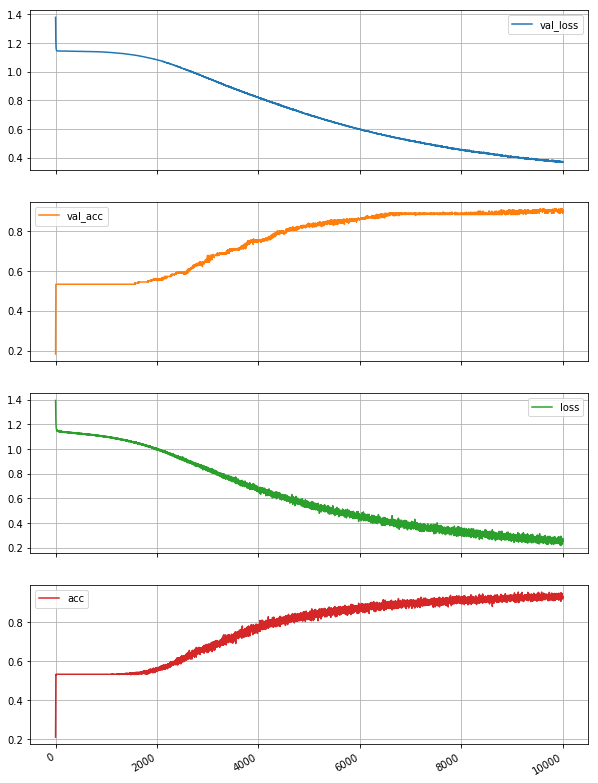

In [203]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [204]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [205]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "SDWIVEDI")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50290266")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 2  Correct :98
Testing Accuracy: 98.0
